In [1]:
%matplotlib inline

from IPython.display import display
from numpy.testing import assert_almost_equal

# Packages for dimensionality reducti
from sklearn.decomposition import PCA
import numpy as np
from numpy.linalg import inv, eig

# Packages for  data processing and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_csv, set_option
import seaborn as sns
from sklearn.preprocessing import StandardScaler

import pandas_ta as ta

In [2]:
# max output width in numpy
np.set_printoptions(
    threshold=20,
    edgeitems=10,
    linewidth=140,
    formatter=dict(float=lambda x: "%.3g" % x),
)  # float arrays %.3g

# display setting for pandas
pd.options.display.max_columns = None
pd.options.display.expand_frame_repr = False
# Suppress Scientific Notation in Pandas
pd.options.display.float_format = "{:.4g}".format

In [3]:
dataset = pd.read_csv("Dow_adjcloses.csv")
dataset.set_index("Date", inplace=True)
dataset.shape

(4804, 30)

In [4]:
dataset.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,DWDP,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,V,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-03,29.85,35.48,3.531,26.65,14.56,21.58,43,16.98,23.52,NaN,23.86,72.32,45.14,81.45,28.53,28.58,26.86,24.39,32.9,38.14,4.701,16.75,32.23,20.16,21.32,5.841,22.56,NaN,47.34,21.71
2000-01-04,28.66,34.13,3.233,26.61,14.37,21.58,40.58,17.04,24.9,NaN,23.41,67.76,40.51,78.68,27.19,27.54,26.28,23.89,31.74,36.85,4.445,16.12,31.6,19.89,20.45,5.766,21.83,NaN,45.57,20.91
2000-01-05,30.12,33.96,3.28,28.47,14.91,22.05,40.9,17.23,25.78,NaN,24.57,65.26,42.76,81.45,27.75,27.96,26.12,24.39,33.2,37.24,4.702,16.42,31.33,20.09,20.25,5.753,22.56,NaN,44.5,21.1
2000-01-06,31.88,33.96,2.996,28.55,15.46,22.9,39.78,17.21,24.9,NaN,25.96,67.35,41.55,80.05,25.82,28.7,26.49,23.93,33.26,35.99,4.678,16.97,32.44,20.12,21,5.964,22.45,NaN,45.13,20.53
2000-01-07,32.51,34.43,3.138,29.38,15.96,23.31,42.13,18.34,24.51,NaN,25.88,67.61,43.97,79.69,26.89,29.92,26.97,24.55,36.45,36.46,4.678,18.12,35.02,20.92,21.83,6.663,22.28,NaN,48.54,21.05


In [ ]:
correlation = dataset.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation, vmax=1, square=True, annot=True, cmap="cubehelix")

In [6]:
y = dataset.isnull()
z = y.sum()
z[z > 0]

DWDP    4441
V       2063
dtype: int64

In [4]:
missing_fractions = dataset.isnull().mean().sort_values(ascending=False)
missing_fractions.head()
drop_list = missing_fractions[missing_fractions > 0.3].index.values
dataset.drop(drop_list, axis=1, inplace=True)
dataset.shape

(4804, 28)

In [8]:
x = dataset.isnull().sum()
x[x > 0].index

Index([], dtype='object')

In [5]:
datareturns_original = dataset.pct_change(1).dropna()
# datareturns = datareturns[
#     datareturns.apply(lambda x: (x - x.mean()).abs() < (3 / x.std())).all(1)
# ]
datareturns_original_statistic = datareturns_original.describe()
display(datareturns_original_statistic)
datareturns = datareturns_original[
    datareturns_original.apply(lambda x: (x - x.mean()).abs() < (3 * x.std())).all(1)
]
with pd.option_context("display.float_format", "{:.4g}".format):
    display(datareturns.head())
    display(datareturns.describe())

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
count,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803,4803
mean,0.0005032,0.0004748,0.001161,0.0007485,0.0006618,0.0004831,0.0003218,0.0003056,0.0005003,0.0003545,0.000479,0.0004845,0.0002399,0.0003913,0.0003928,0.0005834,0.0005169,0.000326,0.0003983,0.0007752,0.0003151,0.0003215,0.0005448,0.0005037,0.0009921,0.0003018,0.0002592,0.0003979
std,0.01446,0.02235,0.02579,0.01889,0.02026,0.01601,0.02462,0.01296,0.0188,0.0152,0.02337,0.01947,0.01629,0.0234,0.01203,0.0247,0.0145,0.0171,0.01927,0.01886,0.01562,0.01323,0.01817,0.01672,0.01979,0.01558,0.01503,0.0173
min,-0.08957,-0.1759,-0.5187,-0.1763,-0.1452,-0.1249,-0.1621,-0.1006,-0.1836,-0.1395,-0.1896,-0.2873,-0.1554,-0.2202,-0.1585,-0.2073,-0.1282,-0.2678,-0.1561,-0.1946,-0.1115,-0.3024,-0.1818,-0.2825,-0.1864,-0.1185,-0.1018,-0.1499
25%,-0.00619,-0.008247,-0.01063,-0.009047,-0.009458,-0.007739,-0.009457,-0.005532,-0.008274,-0.00716,-0.01016,-0.008264,-0.007074,-0.01037,-0.005056,-0.008952,-0.006404,-0.00748,-0.008195,-0.0079,-0.007227,-0.005261,-0.007322,-0.007074,-0.008226,-0.007419,-0.006885,-0.008336
50%,0.0005266,0.0002922,0.0007651,0.000814,0.0004414,0.0007669,0.0004598,0.0003671,0.0003733,0.0003948,0.0002862,0.000334,0.0002289,0.0004613,0.0002287,0,0.0007168,0.0002783,0.0001748,0.0005177,0,0.0002226,0.0004233,0.0005105,0.0007814,0.0002207,0.0002315,0.0001296
75%,0.007436,0.009487,0.01309,0.01068,0.01086,0.008801,0.01051,0.006204,0.008931,0.008072,0.01096,0.00917,0.007533,0.01125,0.006057,0.009624,0.007316,0.008449,0.008913,0.008953,0.007926,0.00598,0.008005,0.008354,0.01007,0.007819,0.007008,0.009053
max,0.1105,0.2065,0.139,0.1546,0.1472,0.2085,0.2439,0.1388,0.1597,0.1719,0.2647,0.1407,0.1202,0.2012,0.1223,0.251,0.09389,0.1303,0.1957,0.1427,0.1017,0.1021,0.2556,0.1365,0.3476,0.1463,0.1107,0.1664


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-0.0176,0.009056,-0.05115,-0.01579,-0.01571,-0.009331,-0.03005,0.03401,0.01031,0.01194,0.005096,-0.0258,0.008475,0.04595,0,-0.02364,0.02346,0.0008247,-0.02566,0.05011,-0.001742,0.01639,-0.0113,-0.02321,0.002158,-0.009402,-0.01487,0.03965
2000-01-20,-0.03724,0.01679,0.06513,-0.02372,-0.04421,-0.005003,0.0008905,0.009655,-0.03223,-0.02186,-0.01713,-0.01729,-0.004184,-0.04466,0.003383,-0.0009443,0.004247,0.02014,-0.009346,-0.02367,-0.01649,-0.02426,-0.005486,-0.02274,0.02521,0.003123,-0.01062,0
2000-02-02,-0.01732,-0.0284,-0.01436,0.02011,0.005788,-0.006732,-0.03311,-0.0301,0.03472,0.007453,-0.001315,-0.02016,0.03182,-0.01321,0.005188,-0.01636,-0.03085,0.0009113,-0.02069,0.01606,-0.02703,-0.008744,-0.04879,0.001118,0.02645,-0.004197,-0.005282,0.004512
2000-02-03,-0.008757,-0.007917,0.04554,-0.02666,-0.02601,-0.0144,0.03424,-0.02004,0.01691,-0.01706,-0.0631,-0.004115,0.03189,0.04167,-0.02276,0.009832,-0.01408,-0.008195,0.02787,0.009275,-0.01028,-0.008314,-0.04484,-0.01507,-0.008948,-0.01467,0,-0.002073
2000-02-04,-0.02868,-0.009208,0.0454,0.01289,0,-0.03536,0.02801,0.0181,0.0066,-0.01821,-0.008082,0.01025,-0.01281,0.005758,-0.01416,-0.01731,0.003429,-0.01561,0.02837,-0.02485,0.003368,-0.03129,0.004506,-0.02947,0.02474,0.002053,-0.03546,0.01073


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
count,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892
mean,0.0005944,0.0005074,0.001221,0.0009399,0.0008473,0.0006492,0.0005248,0.0003449,0.000486,0.0004216,0.0003476,0.0004908,0.0005418,0.000359,0.0003514,0.0003133,0.0006357,0.0005175,0.0005951,0.0007729,0.0002955,0.0004327,0.000521,0.0006699,0.001047,0.0003212,0.0002193,0.000476
std,0.01062,0.01512,0.01934,0.01477,0.0159,0.01268,0.01667,0.009434,0.01355,0.01174,0.01635,0.01431,0.01144,0.0169,0.008814,0.01635,0.01076,0.0122,0.01356,0.01346,0.01181,0.009009,0.01263,0.01222,0.01461,0.01163,0.01098,0.01332
min,-0.04107,-0.06534,-0.07085,-0.05368,-0.0578,-0.04749,-0.07215,-0.0375,-0.05443,-0.04444,-0.06701,-0.0562,-0.04762,-0.0693,-0.03169,-0.07214,-0.04151,-0.04811,-0.05672,-0.05224,-0.04577,-0.03647,-0.0538,-0.04594,-0.05687,-0.0461,-0.04367,-0.05021
25%,-0.005258,-0.00695,-0.009053,-0.007869,-0.008193,-0.006867,-0.00772,-0.004919,-0.006909,-0.006541,-0.008949,-0.007158,-0.006051,-0.009305,-0.004381,-0.007848,-0.005462,-0.00657,-0.007005,-0.006945,-0.006365,-0.004597,-0.006364,-0.006273,-0.007164,-0.006474,-0.00594,-0.00751
50%,0.0006089,0.0003905,0.0007704,0.0007787,0.0005809,0.0008567,0.0005663,0.0004344,0.0005113,0.0002622,0.0004247,0.0003752,0.0003043,0.0006009,0.0001654,0.0002139,0.0007503,0.0003137,0.0002383,0.0005746,0,0.000304,0.0005152,0.0005436,0.0007932,0.0004545,0.0002222,0.0001801
75%,0.006839,0.008471,0.01166,0.009896,0.01005,0.008336,0.009531,0.005609,0.00805,0.007421,0.009887,0.008208,0.006822,0.009963,0.005366,0.008661,0.006765,0.007588,0.008079,0.008227,0.006966,0.005349,0.007417,0.007542,0.00926,0.007048,0.006336,0.008317
max,0.04252,0.06585,0.07712,0.0571,0.06139,0.04775,0.07253,0.03849,0.05526,0.04411,0.06986,0.05695,0.04774,0.06878,0.03636,0.07328,0.04392,0.051,0.05654,0.05536,0.046,0.03802,0.05504,0.04933,0.05953,0.04396,0.04522,0.05049


In [6]:
percentage = int(len(datareturns) * 0.8)
X_train = datareturns[:percentage]
X_test = datareturns[percentage:]
stock_tickers = datareturns.columns.values
n_tickers = len(stock_tickers)
print(n_tickers)
print(X_train.shape)
print(X_test.shape)

28
(3113, 28)
(779, 28)


In [7]:
scaler = StandardScaler()
X_train = pd.DataFrame(
    scaler.fit_transform(X_train), columns=X_train.columns, index=X_train.index
)
display(X_train.describe())

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
count,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113
mean,1.655e-17,2.054e-17,-2.283e-18,-1.826e-17,-2.625e-17,-4.565e-18,-6.562e-18,1.427e-17,-1.598e-17,4.565e-18,-9.13e-18,-1.37e-17,2.397e-17,-4.565e-18,-1.141e-17,1.37e-17,1.598e-17,1.469e-17,4.565e-18,7.989e-18,0,-6.277e-18,5.136e-18,1.255e-17,-9.13e-18,-1.541e-17,9.13e-18,-4.565e-18
std,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
min,-3.818,-4.109,-3.532,-3.609,-3.64,-3.754,-4.114,-3.853,-3.868,-3.762,-3.986,-3.764,-4.118,-3.965,-3.596,-4.197,-3.769,-3.858,-4,-3.927,-3.797,-4.024,-4.075,-3.675,-3.785,-3.879,-3.93,-3.597
25%,-0.5585,-0.5129,-0.5705,-0.6161,-0.5797,-0.6211,-0.5191,-0.5706,-0.5812,-0.6027,-0.5829,-0.5509,-0.5842,-0.5811,-0.5402,-0.5078,-0.5944,-0.5933,-0.5767,-0.572,-0.5822,-0.5684,-0.5593,-0.5811,-0.5836,-0.5784,-0.572,-0.607
50%,0.002395,-0.01478,-0.02355,-0.01684,-0.01458,0.02149,0.0047,0.00616,0.005991,-0.01741,0.007344,-0.00545,-0.02515,0.0136,-0.01101,0.0008541,0.01461,-0.01621,-0.02598,-0.006832,-0.01987,-0.0185,-0.002539,-0.00662,-0.01311,0.01609,0.001267,-0.03519
75%,0.6014,0.5405,0.5654,0.6135,0.5815,0.6287,0.5546,0.5607,0.5718,0.6197,0.5872,0.542,0.5559,0.587,0.5674,0.5171,0.5724,0.5737,0.5582,0.5501,0.5811,0.544,0.5452,0.5772,0.5757,0.5771,0.5512,0.5938
max,3.864,4.083,3.712,3.749,3.771,3.752,4.093,3.895,3.857,3.654,4.113,3.767,4.041,3.917,4.075,4.24,3.885,4.006,4.064,4.049,3.777,4.116,4.099,3.848,3.835,3.65,4.049,3.725


In [8]:
X_test = scaler.transform(X_test)

In [107]:
X_train_raw = datareturns[:percentage]
X_test_raw = datareturns[percentage:]

In [108]:
display(X_test_raw)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2015-08-21,-0.00879,-0.02197,-0.06116,-0.03875,-0.01845,-0.04392,-0.02108,-0.02515,-0.0118,-0.03272,-0.04579,-0.03634,-0.02496,-0.03523,-0.0251,-0.03549,-0.02636,-0.02072,-0.05672,-0.04835,-0.02923,-0.02801,-0.02621,-0.02933,-0.0293,-0.01664,-0.02762,-0.04634
2015-08-28,0.002154,-0.002992,0.003277,0.01039,0.003833,0.03594,-0.006496,0.004584,0.003034,0.002939,-0.004281,-0.00119,-0.00377,0.02525,-0.01091,-0.005428,-0.002363,0.007643,0.0006834,-0.001066,-0.01804,-0.003777,-0.009566,-0.0003216,-0.004161,-0.002598,-0.01725,-0.004895
2015-08-31,-0.01435,0.0009132,-0.004678,-0.01921,0.006452,0.006963,-0.004615,-0.003295,-0.005855,0.002265,0.004527,-0.00902,-0.0006082,0.004222,-0.0125,-0.0004678,-0.01278,-0.02745,-0.009333,-0.006667,-0.01347,-0.007583,-0.008762,-0.01748,-0.01347,-0.001302,-0.003234,-0.009952
2015-09-01,-0.02561,-0.03545,-0.0447,-0.02479,-0.02015,-0.03457,-0.02937,-0.0145,-0.02326,-0.042,-0.03436,-0.02404,-0.03523,-0.02523,-0.02011,-0.04134,-0.01631,-0.02451,-0.03906,-0.02792,-0.02669,-0.02505,-0.02069,-0.02063,-0.02653,-0.02413,-0.01406,-0.005893
2015-09-02,0.01978,0.0127,0.04289,0.02503,0.01602,-0.001663,0.0211,0.003871,0.02392,0.01595,0.01312,0.03016,0.01661,0.02804,0.01368,0.01823,0.0275,0.008567,0.03682,0.01906,0.01945,0.01321,0.01477,0.01694,0.01421,0.01002,0.009715,0.0208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-31,0.005169,0.0002922,0.007201,-0.005416,0.02344,0.01451,0.01242,0.005641,0.01262,0.01369,-0.02208,0.00741,0.0002977,-0.008835,0.01094,-0.008716,-0.01645,0.01445,-0.01833,0.007382,0.02958,0.02063,-0.002701,-0.008815,-0.0006288,0.01963,0.01086,0.009077
2019-02-01,-0.005691,0.003505,0.0004807,0.004694,-0.0169,0.03245,0.001057,0.01184,-0.001973,0.03603,-0.007424,0.004577,-0.002381,0.03417,0.008416,0.003671,-0.01152,0.02714,-0.0158,-0.004519,0.01013,0.01037,0.007567,0.007707,-0.005477,-0.009263,-0.02056,-0.005259
2019-02-04,0.005272,0.003493,0.0284,0.0247,-0.0002292,0.01157,0.0002112,0.01129,0.004492,-0.01449,0.006004,0.01117,0.008128,0.01006,-0.009836,0.003562,0.004697,0.005494,0.0288,0.005889,-0.01026,0.005745,-0.003558,0.001345,-0.001898,-0.009349,0.009695,-0.005843


In [10]:
pca = PCA()
pca.fit(X_train)
transfromed_X_Train = X_train @ pca.components_.T
transfromed_X_Train.columns = X_train.columns
print(pca.explained_variance_ratio_)

[0.37 0.057 0.0451 0.0393 0.0352 0.0311 0.0293 0.0277 0.0273 0.0253 ... 0.0183 0.018 0.0167 0.0157 0.0148 0.0144 0.0141 0.0123 0.0105
 0.00711]


In [32]:
transfromed_X_Train0 = pd.DataFrame(
    pca.transform(X_train), columns=X_train.columns, index=X_train.index
)

display(transfromed_X_Train0[:3])
print(pca.explained_variance_ratio_)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-11,0.1974,-2.745,1.647,-0.138,-2.394,0.5648,0.1748,2.641,0.4044,0.392,-2.2,-4.725,1.595,2.468,-0.6657,-0.9965,0.002864,0.02336,-1.087,-0.8297,1.883,0.1168,-0.5849,0.499,-2.429,2.061,-1.553,1.026
2000-01-20,4.016,-0.2905,1.585,-1.213,2.324,-1.084,0.5997,3.7,0.5361,1.58,2.486,-1.016,-0.6085,-0.7175,-1.659,0.9914,-0.2956,-1.009,2.298,-0.6282,-0.6347,-0.7753,2.746,-0.7519,1.445,-0.5341,0.4803,-1.071
2000-02-02,2.661,0.5412,-1.497,0.03456,-0.4658,-2.88,-1.409,-2.131,-0.7342,-2.161,1.92,-2.466,1.638,0.5509,2.904,1.476,-0.5383,-3.024,0.2142,-0.756,2.644,-0.6721,-0.3955,-0.4456,-0.2064,1.028,0.1254,1.093


[0.37 0.057 0.0451 0.0393 0.0352 0.0311 0.0293 0.0277 0.0273 0.0253 ... 0.0183 0.018 0.0167 0.0157 0.0148 0.0144 0.0141 0.0123 0.0105
 0.00711]


In [19]:
pca1 = PCA()
transfromed_X_Train1 = pd.DataFrame(
    pca1.fit_transform(X_train), columns=X_train.columns, index=X_train.index
)

In [28]:
assert_almost_equal(pca.explained_variance_, pca1.explained_variance_)
assert_almost_equal(pca.components_, pca1.components_)
# assert_almost_equal(
#     transfromed_X_Train.describe(), transfromed_X_Train1.describe()
# )

display(transfromed_X_Train[:3])
display(transfromed_X_Train1[:3])
assert_almost_equal(transfromed_X_Train[:3].values, transfromed_X_Train1[:3].values)
display(transfromed_X_Train.describe())
display(transfromed_X_Train1.describe())

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-11,0.1974,-2.745,1.647,-0.138,-2.394,0.5648,0.1748,2.641,0.4044,0.392,-2.2,-4.725,1.595,2.468,-0.6657,-0.9965,0.002864,0.02336,-1.087,-0.8297,1.883,0.1168,-0.5849,0.499,-2.429,2.061,-1.553,1.026
2000-01-20,4.016,-0.2905,1.585,-1.213,2.324,-1.084,0.5997,3.7,0.5361,1.58,2.486,-1.016,-0.6085,-0.7175,-1.659,0.9914,-0.2956,-1.009,2.298,-0.6282,-0.6347,-0.7753,2.746,-0.7519,1.445,-0.5341,0.4803,-1.071
2000-02-02,2.661,0.5412,-1.497,0.03456,-0.4658,-2.88,-1.409,-2.131,-0.7342,-2.161,1.92,-2.466,1.638,0.5509,2.904,1.476,-0.5383,-3.024,0.2142,-0.756,2.644,-0.6721,-0.3955,-0.4456,-0.2064,1.028,0.1254,1.093


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-11,0.1974,-2.745,1.647,-0.138,-2.394,0.5648,0.1748,2.641,0.4044,0.392,-2.2,-4.725,1.595,2.468,-0.6657,-0.9965,0.002864,0.02336,-1.087,-0.8297,1.883,0.1168,-0.5849,0.499,-2.429,2.061,-1.553,1.026
2000-01-20,4.016,-0.2905,1.585,-1.213,2.324,-1.084,0.5997,3.7,0.5361,1.58,2.486,-1.016,-0.6085,-0.7175,-1.659,0.9914,-0.2956,-1.009,2.298,-0.6282,-0.6347,-0.7753,2.746,-0.7519,1.445,-0.5341,0.4803,-1.071
2000-02-02,2.661,0.5412,-1.497,0.03456,-0.4658,-2.88,-1.409,-2.131,-0.7342,-2.161,1.92,-2.466,1.638,0.5509,2.904,1.476,-0.5383,-3.024,0.2142,-0.756,2.644,-0.6721,-0.3955,-0.4456,-0.2064,1.028,0.1254,1.093


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
count,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113
mean,-1.484e-17,4.565e-18,1.37e-17,2.283e-18,2.283e-18,7.989e-18,4.565e-18,1.94e-17,9.701e-18,5.421e-18,-2.397e-17,3.994e-18,0,1.712e-18,6.848e-18,1.141e-17,9.701e-18,-1.598e-17,-6.848e-18,1.084e-17,2.283e-18,2.397e-17,3.652e-17,2.853e-17,4.565e-18,1.712e-18,9.701e-18,-5.706e-19
std,3.219,1.263,1.123,1.049,0.9936,0.9326,0.9053,0.8815,0.8747,0.8421,0.8227,0.8125,0.7939,0.7765,0.7572,0.7491,0.7402,0.7303,0.7166,0.7092,0.6848,0.6633,0.6444,0.6351,0.6295,0.5869,0.5413,0.4463
min,-11.74,-6.621,-4.4,-4.719,-4.67,-3.821,-3.859,-3.814,-3.549,-3.639,-4.001,-4.725,-3.832,-3.837,-3.346,-3.424,-3.099,-3.024,-3.837,-2.941,-3.239,-2.839,-2.705,-3.418,-2.565,-2.435,-2.592,-2.135
25%,-1.943,-0.7091,-0.6734,-0.6194,-0.5757,-0.563,-0.5305,-0.5425,-0.5243,-0.5115,-0.5018,-0.4956,-0.4891,-0.454,-0.4403,-0.4456,-0.4442,-0.4177,-0.4058,-0.449,-0.4214,-0.41,-0.3905,-0.3757,-0.3682,-0.3463,-0.3092,-0.2602
50%,-0.114,0.03076,-0.03492,0.003978,0.01272,-0.001059,-0.0149,-0.00185,-0.0008468,-0.002084,-0.001173,-0.01323,-0.00978,-0.01918,-0.006865,-0.006773,-0.0008202,-0.005511,-0.003561,0.004355,-0.006139,0.00721,-0.01574,-0.005823,0.01978,0.009915,0.00889,0.006082
75%,1.772,0.7144,0.6613,0.6284,0.5888,0.5497,0.5117,0.5447,0.5315,0.5032,0.4804,0.4702,0.4851,0.4549,0.4423,0.4437,0.4306,0.4071,0.4088,0.4262,0.4128,0.3978,0.3748,0.3739,0.3745,0.3444,0.3005,0.2505
max,12.95,7.255,5.058,5.629,5.125,4.621,4.144,4.026,4.185,3.877,4.213,4.746,4.191,4.365,3.864,3.737,4.669,4.522,3.966,3.251,3.421,2.95,3.375,3.678,2.985,2.451,3.377,2.442


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
count,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113,3113
mean,-4.337e-17,-1.598e-17,9.13e-18,-4.565e-18,3.424e-18,1.198e-17,-1.255e-17,1.141e-17,2.967e-17,1.569e-17,-3.652e-17,1.427e-17,1.484e-17,-4.565e-18,-1.37e-17,4.565e-18,1.712e-18,-1.312e-17,1.141e-18,2.482e-17,-1.141e-18,1.084e-17,1.655e-17,2.111e-17,1.17e-17,2.853e-19,1.312e-17,-7.133e-18
std,3.219,1.263,1.123,1.049,0.9936,0.9326,0.9053,0.8815,0.8747,0.8421,0.8227,0.8125,0.7939,0.7765,0.7572,0.7491,0.7402,0.7303,0.7166,0.7092,0.6848,0.6633,0.6444,0.6351,0.6295,0.5869,0.5413,0.4463
min,-11.74,-6.621,-4.4,-4.719,-4.67,-3.821,-3.859,-3.814,-3.549,-3.639,-4.001,-4.725,-3.832,-3.837,-3.346,-3.424,-3.099,-3.024,-3.837,-2.941,-3.239,-2.839,-2.705,-3.418,-2.565,-2.435,-2.592,-2.135
25%,-1.943,-0.7091,-0.6734,-0.6194,-0.5757,-0.563,-0.5305,-0.5425,-0.5243,-0.5115,-0.5018,-0.4956,-0.4891,-0.454,-0.4403,-0.4456,-0.4442,-0.4177,-0.4058,-0.449,-0.4214,-0.41,-0.3905,-0.3757,-0.3682,-0.3463,-0.3092,-0.2602
50%,-0.114,0.03076,-0.03492,0.003978,0.01272,-0.001059,-0.0149,-0.00185,-0.0008468,-0.002084,-0.001173,-0.01323,-0.00978,-0.01918,-0.006865,-0.006773,-0.0008202,-0.005511,-0.003561,0.004355,-0.006139,0.00721,-0.01574,-0.005823,0.01978,0.009915,0.00889,0.006082
75%,1.772,0.7144,0.6613,0.6284,0.5888,0.5497,0.5117,0.5447,0.5315,0.5032,0.4804,0.4702,0.4851,0.4549,0.4423,0.4437,0.4306,0.4071,0.4088,0.4262,0.4128,0.3978,0.3748,0.3739,0.3745,0.3444,0.3005,0.2505
max,12.95,7.255,5.058,5.629,5.125,4.621,4.144,4.026,4.185,3.877,4.213,4.746,4.191,4.365,3.864,3.737,4.669,4.522,3.966,3.251,3.421,2.95,3.375,3.678,2.985,2.451,3.377,2.442


<Axes: >

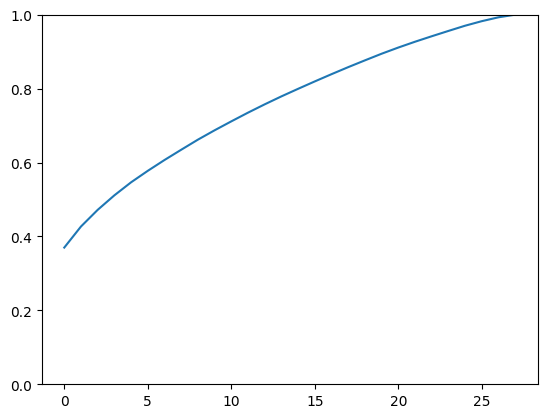

In [11]:
pd.Series(pca.explained_variance_ratio_.cumsum()).plot(ylim=(0, 1))

In [56]:
weights = pd.DataFrame()
sums = pd.DataFrame()
for i in range(len(pca.components_)):
    weights[f"weights_{i}"] = pca.components_[i] / sum(pca.components_[i])
# weights = pd.concat(
#     [
#         pd.DataFrame(
#             {
#                 f"weights_{i}": [sum(pca.components_[i])]
#                 for i in range(len(pca.components_))
#             },
#             index=["sum"],
#         ),
#         weights,
#     ]
# )
print(weights)
# weights = weights.T
# display(weights)

    weights_0  weights_1  weights_2  weights_3  weights_4  weights_5  weights_6  weights_7  weights_8  weights_9  weights_10  weights_11  weights_12  weights_13  weights_14  weights_15  weights_16  weights_17  weights_18  weights_19  weights_20  weights_21  weights_22  weights_23  weights_24  weights_25  weights_26  weights_27
0     0.04372    0.07411    -0.5697    -0.2883     0.7279     0.4259      1.379     -0.627    -0.2386     -2.244     -0.2391       20.63       3.156     -0.3082      -2.717      -3.485       -2.84      -92.23       1.112      -5.763     -0.5189       -1.52       -0.38      -7.134      -1.366       10.54     -0.7747    -0.01271
1      0.0421    -0.3919    0.09668     -1.283     -1.333    -0.7875     -0.417     0.3238      1.274      2.035    -0.08225      -47.49     -0.4445      -1.221      -1.215      0.9189    -0.05109      -41.92       0.439      0.9238      -3.421     -0.6705       -12.1      0.5026       21.15      -1.764       6.928      0.3404
2     0.02829

In [147]:
eig_vectors = pd.DataFrame(pca.components_)
weights1 = eig_vectors.div(eig_vectors.sum(axis=1), axis=0)
# display(pca.components_.sum(axis=1))
# display(sum(pca.components_[0]))
# display(pca.components_[0])
# weights1 = (pca.components_.T / pca.components_.sum(axis=1)).T
weights1.index = [f"weights{i}" for i in range(len(pca.components_))]
display(weights1)
assert_almost_equal(weights.values, weights1.values)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
weights0,0.04341,0.04351,0.02916,0.03615,0.03849,0.03394,0.03717,0.0321,0.03967,0.03679,0.03979,0.03855,0.038,0.0372,0.0318,0.04346,0.02888,0.03238,0.03691,0.03262,0.03619,0.03202,0.03766,0.04318,0.02634,0.0318,0.0322,0.03062
weights1,0.0833,-0.3151,-1.149,-0.04295,-0.292,0.443,-1.235,0.8495,-0.3133,0.518,-0.5663,-0.04039,-0.6223,-1.145,1.198,-0.4397,0.3724,1.047,-0.7246,-0.008282,0.7981,1.029,0.1613,-0.1436,0.5787,0.2782,0.2558,0.4244
weights2,-0.6464,-0.03605,0.2629,-0.7802,-1.338,-2.483,0.5929,0.6339,0.2619,-2.259,-0.5353,0.9841,0.3923,0.736,0.5031,-0.3507,0.5028,0.7036,0.547,0.3222,0.572,0.6929,-0.1691,-0.8324,-0.3276,0.6732,1.546,0.831
weights3,-0.0828,-1.196,1.173,-0.5042,-0.1783,0.876,0.9061,0.6036,-0.2323,1.012,-1.249,-0.9582,0.8614,1.104,0.59,-1.357,-0.2091,0.6367,0.9727,-0.6518,0.5883,0.3456,-0.9683,-0.2881,-0.2018,0.1373,-0.3916,-0.3389
weights4,0.8001,-1.098,0.2902,1.03,0.947,0.3049,-0.3062,0.8719,-0.07511,0.3058,-1.814,1.07,0.1561,-0.2005,-1.037,-1.842,2.154,-2.337,-0.3635,1.7,-2.118,1.04,-0.7823,0.9165,-0.4897,-0.7969,1.389,1.285
weights5,0.2786,-0.6056,0.7593,0.4149,0.126,-0.4967,0.1368,-0.9533,-0.3862,-0.7107,-0.2242,0.3243,-0.08805,0.1272,0.3666,-0.4918,-0.7536,0.2439,0.08172,0.4552,0.6285,-0.912,-0.692,0.4884,4.002,-2.15,-0.1938,1.224
weights6,0.2142,0.103,1.324,2.653,-0.2806,-2.297,0.9545,2.035,0.6104,-2.516,0.2165,-3.809,-0.5035,-0.4211,-0.3317,-0.3053,5.412,-0.02273,-0.4904,-2.008,-0.1295,1.345,1.901,1.461,1.758,0.2206,-4.342,-1.751
weights7,-0.832,0.3585,0.5245,-1.831,-0.8124,0.601,-0.1481,1.109,-0.8224,0.7691,0.313,0.109,0.5121,0.05568,-0.7911,0.6337,0.5701,-1.052,0.09213,0.2095,-0.8324,0.3502,0.9589,-1.282,1.823,0.5101,0.123,-0.2192
weights8,-0.6279,0.7534,2.639,-1.655,-0.2395,1.212,-0.05813,-2.249,0.2622,0.82,0.8511,1,-0.757,-0.6807,-0.04606,0.1063,4.748,2.135,-1.698,1.619,1.891,-1.492,-1.168,-1.934,-1.569,-2.475,0.04769,-0.435
weights9,-0.5652,0.3683,8.587,0.5327,0.5131,-0.1591,-1.397,-0.1171,-8.541,-0.4882,2.825,-1.772,-1.286,-0.2891,1.272,2.147,-3.021,-0.2248,-2.378,-5.114,-0.8117,5.525,4.045,0.7805,-5.094,-3.866,-0.2368,9.764


In [64]:
display(pca.components_[:5])

array([[-0.23, -0.221, -0.149, -0.192, -0.206, -0.187, -0.189, -0.167, -0.204, -0.197, ..., -0.196, -0.177, -0.191, -0.172, -0.193,
        -0.225, -0.136, -0.167, -0.172, -0.165],
       [-0.018, 0.0951, 0.312, 0.0211, 0.0944, -0.136, 0.339, -0.237, 0.094, -0.153, ..., 0.214, 0.0109, -0.232, -0.304, -0.0362, 0.0498,
        -0.155, -0.0766, -0.0703, -0.123],
       [-0.121, 0.0206, 0.0279, -0.135, -0.266, -0.551, 0.0959, 0.111, 0.0559, -0.49, ..., 0.0941, 0.0821, 0.106, 0.137, -0.00651, -0.147,
        -0.0462, 0.131, 0.321, 0.185],
       [0.0576, 0.256, -0.274, 0.178, 0.0986, -0.165, -0.239, -0.14, 0.0481, -0.199, ..., -0.276, 0.203, -0.177, -0.0789, 0.217, 0.114,
        0.0705, -0.0661, 0.0847, 0.104],
       [-0.112, 0.205, -0.0733, -0.127, -0.134, -0.0751, 0.0239, -0.156, 0.0306, -0.0791, ..., 0.0269, -0.277, 0.328, -0.188, 0.153,
        -0.116, 0.0889, 0.121, -0.233, -0.217]])

In [13]:
NumComponents = 5
topPortfolios = pd.DataFrame(pca.components_[:NumComponents], columns=X_train.columns)
eigen_portfolios = topPortfolios.div(topPortfolios.sum(axis=1), axis=0)
eigen_portfolios.index = [f"Portfolio {i}" for i in range(NumComponents)]
display(eigen_portfolios)
assert_almost_equal(eigen_portfolios.values, weights[:NumComponents].values)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Portfolio 0,0.04372,0.0421,0.02829,0.03659,0.03932,0.03557,0.03602,0.03185,0.03888,0.03753,0.03952,0.03773,0.0383,0.03684,0.03277,0.04228,0.02868,0.03237,0.03728,0.03365,0.03642,0.03271,0.03666,0.04294,0.02594,0.03185,0.03276,0.03142
Portfolio 1,0.07411,-0.3919,-1.284,-0.08708,-0.3891,0.5601,-1.396,0.9749,-0.3874,0.6324,-0.7,-0.082,-0.7569,-1.34,1.488,-0.5424,0.4135,1.239,-0.8831,-0.04473,0.9563,1.252,0.1491,-0.2053,0.6381,0.3155,0.2899,0.5079
Portfolio 2,-0.5697,0.09668,0.1313,-0.6365,-1.252,-2.591,0.451,0.5242,0.2632,-2.305,-0.3413,0.957,0.2936,0.576,0.4616,-0.1601,0.4665,0.6067,0.4429,0.3864,0.5006,0.6459,-0.03061,-0.6929,-0.2174,0.6155,1.509,0.8692
Portfolio 3,-0.2883,-1.283,1.373,-0.8919,-0.4937,0.8236,1.196,0.7011,-0.2406,0.9956,-1.415,-1.097,1.175,1.5,0.8181,-1.456,-0.3956,0.9497,1.382,-1.014,0.8846,0.395,-1.086,-0.5686,-0.3527,0.331,-0.424,-0.5189
Portfolio 4,0.7279,-1.333,0.4774,0.8298,0.8755,0.489,-0.1554,1.018,-0.199,0.5152,-2.169,0.8977,0.3533,0.02504,-1.025,-2.114,2.052,-2.299,-0.175,1.805,-2.136,1.222,-0.9966,0.7521,-0.5786,-0.7866,1.514,1.413


array([[<Axes: title={'center': 'Portfolio 0'}>],
       [<Axes: title={'center': 'Portfolio 1'}>],
       [<Axes: title={'center': 'Portfolio 2'}>],
       [<Axes: title={'center': 'Portfolio 3'}>],
       [<Axes: title={'center': 'Portfolio 4'}>]], dtype=object)

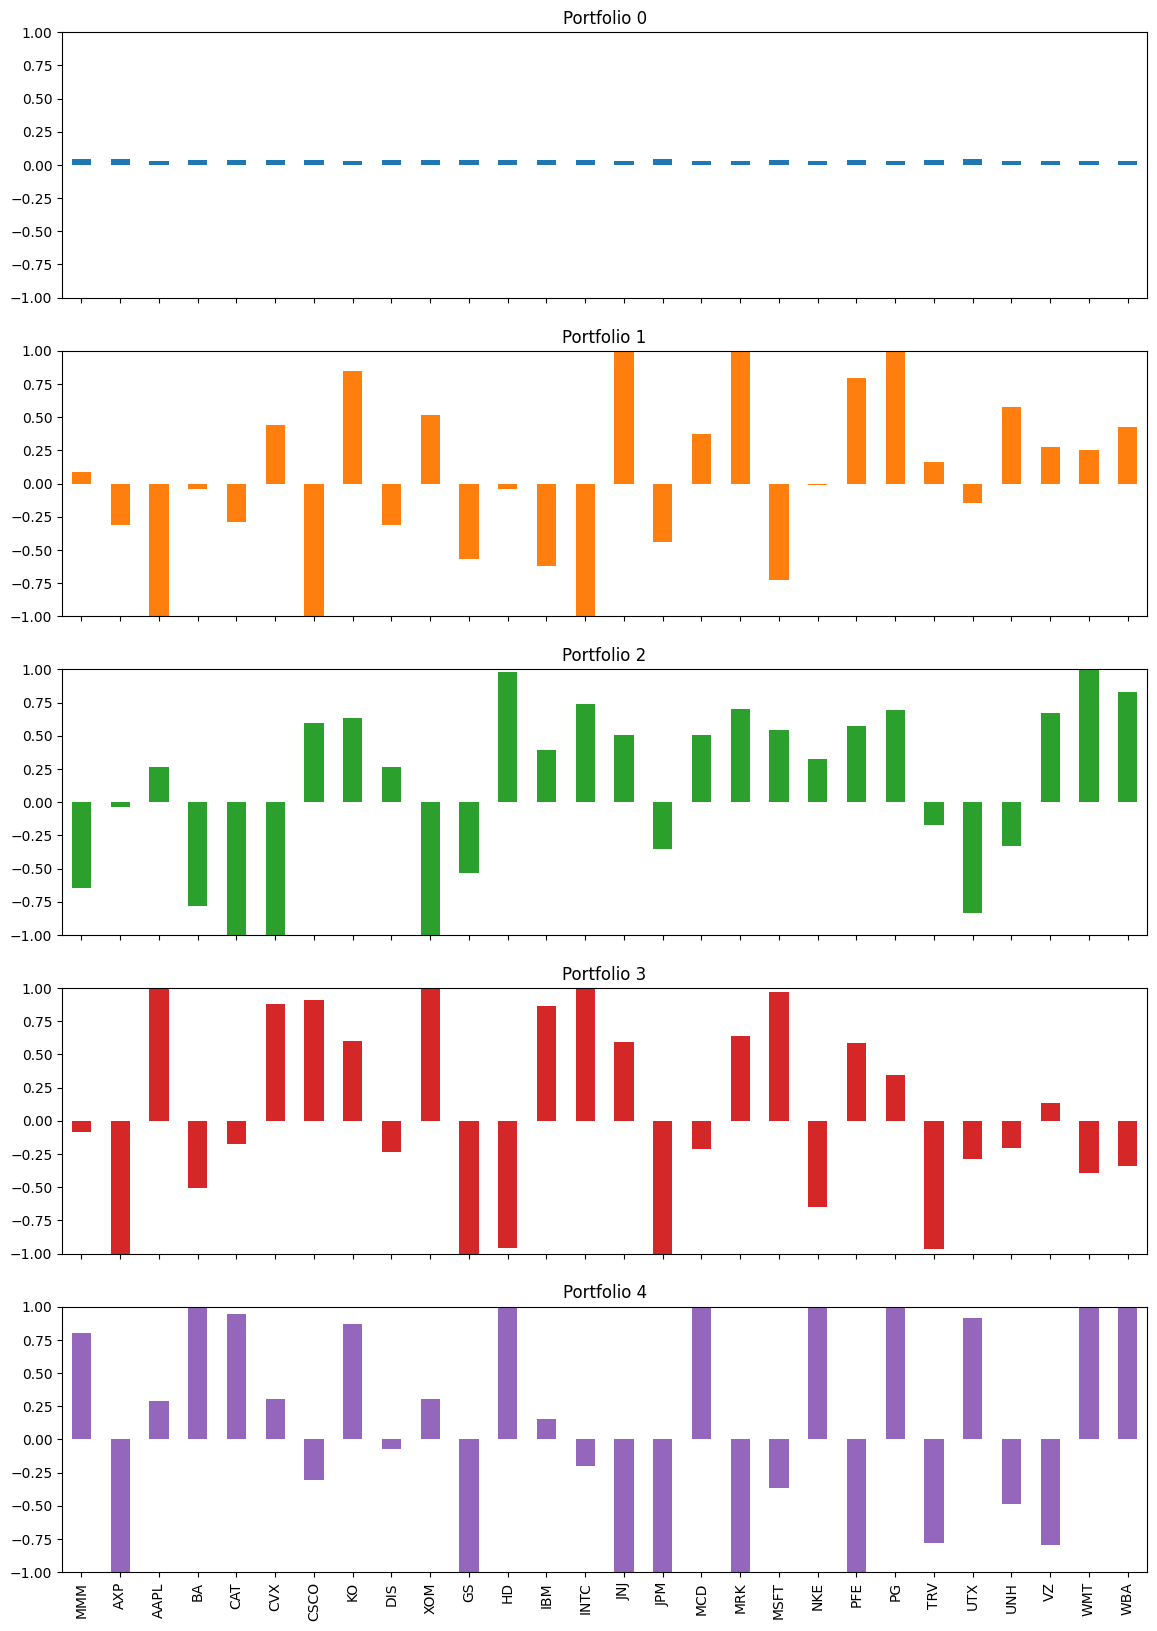

In [149]:
eigen_portfolios.T.plot.bar(
    subplots=True,
    figsize=(14, 20),
    ylim=(-1, 1),
    legend=False,
    sharey=True,
    layout=(int(NumComponents), 1),
)

<Axes: >

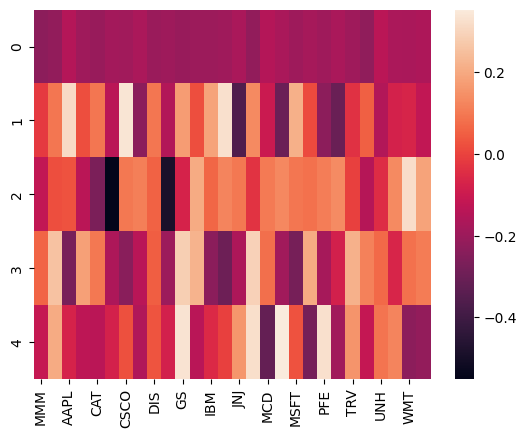

In [81]:
sns.heatmap(topPortfolios)

In [14]:
# def sharpe_ratio(ts_returns, periods_per_year=252):
#     n_years = ts_returns.shape[0] / periods_per_year
#     annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1

#     if annualized_return.isna().sum() > 0:
#         annualized_return.fillna(0, inplace=True)
#     annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
#     if annualized_vol.isna().sum() > 0:
#         annualized_vol.fillna(0, inplace=True)
#         annualized_sharpe = 0
#     else:
#         annualized_sharpe = annualized_return / annualized_vol

#     return annualized_return, annualized_vol, annualized_sharpe


# Sharpe Ratio
def sharpe_ratio(ts_returns, periods_per_year=252):
    """
    Sharpe ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk.
    It calculares the annualized return, annualized volatility, and annualized sharpe ratio.

    ts_returns are  returns of a signle eigen portfolio.
    """
    n_years = ts_returns.shape[0] / periods_per_year
    annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1
    annualized_vol = ts_returns.std() * np.sqrt(periods_per_year)
    annualized_sharpe = annualized_return / annualized_vol

    return annualized_return, annualized_vol, annualized_sharpe

Eigen portfolio #0 with the highest Sharpe. Return 11.51%, vol = 13.40%, Sharpe = 0.86
    Return    Vol  Sharpe
0   0.1151  0.134  0.8593
10  0.5123 0.7847  0.6528
7   0.1734 0.6339  0.2735
5   0.1919  1.301  0.1475
22      -1  9.508 -0.1052
19 -0.1225 0.9641 -0.1271
4  -0.3125  1.419 -0.2202
6  -0.9692  3.044 -0.3184
21 -0.5354  1.549 -0.3457
20 -0.9953  2.824 -0.3524
12 -0.9776  2.678 -0.3651
14 -0.9639  2.491 -0.3869
16 -0.9735  2.463 -0.3953
3  -0.5084  1.275 -0.3986
25 -0.6212  1.535 -0.4046
18 -0.8859  1.955 -0.4532
1  -0.5911  1.233 -0.4795
13 -0.7597  1.557 -0.4881
2  -0.6134  1.071 -0.5728


/tmp/ipykernel_15641/2368601429.py:26: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1
/tmp/ipykernel_15641/2368601429.py:26: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1
/tmp/ipykernel_15641/2368601429.py:26: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1
/tmp/ipykernel_15641/2368601429.py:26: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1
/tmp/ipykernel_15641/2368601429.py:26: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1
/tmp/ipykernel_15641/2368601429.py:26: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1
/tmp/ipyke

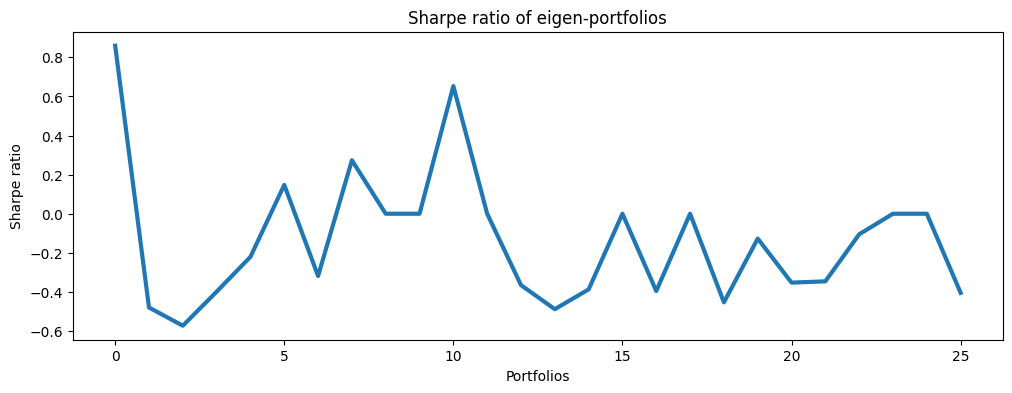

In [78]:
def optimizedPortfolio():
    n_portfolios = len(pca.components_)
    annualized_ret = np.array([0.0] * n_portfolios)
    sharpe_metric = np.array([0.0] * n_portfolios)
    annualized_vol = np.array([0.0] * n_portfolios)
    highest_sharpe = 0
    stock_tickers = X_train.columns.values
    n_tickers = len(stock_tickers)
    pcs = pca.components_

    for i in range(n_portfolios):

        pc_w = pcs[i] / sum(pcs[i])
        eigen_prtfi = pd.DataFrame(
            data={"weights": pc_w.squeeze() * 100}, index=stock_tickers
        )
        eigen_prtfi.sort_values(by=["weights"], ascending=False, inplace=True)
        eigen_prti_returns = np.dot(X_train_raw, pc_w)
        eigen_prti_returns = pd.Series(
            eigen_prti_returns.squeeze(), index=X_train_raw.index
        )
        er, vol, sharpe = sharpe_ratio(eigen_prti_returns)
        annualized_ret[i] = er
        annualized_vol[i] = vol
        sharpe_metric[i] = sharpe

        sharpe_metric = np.nan_to_num(sharpe_metric)

    noninf_idx = np.where(~np.isinf(annualized_ret))

    # find portfolio with the highest Sharpe ratio
    highest_sharpe = np.argmax(sharpe_metric[noninf_idx])

    print(
        "Eigen portfolio #%d with the highest Sharpe. Return %.2f%%, vol = %.2f%%, Sharpe = %.2f"
        % (
            highest_sharpe,
            annualized_ret[highest_sharpe] * 100,
            annualized_vol[highest_sharpe] * 100,
            sharpe_metric[highest_sharpe],
        )
    )

    fig, ax = plt.subplots()
    fig.set_size_inches(12, 4)
    ax.plot(sharpe_metric[noninf_idx], linewidth=3)
    ax.set_title("Sharpe ratio of eigen-portfolios")
    ax.set_ylabel("Sharpe ratio")
    ax.set_xlabel("Portfolios")

    results = pd.DataFrame(
        data={
            "Return": annualized_ret[noninf_idx],
            "Vol": annualized_vol[noninf_idx],
            "Sharpe": sharpe_metric[noninf_idx],
        }
    )
    results.dropna(inplace=True)
    results.sort_values(by=["Sharpe"], ascending=False, inplace=True)
    print(results.head(20))

    plt.show()


optimizedPortfolio()

pandas.core.series.Series

Sum of weights of current eigen-portfolio: 100.00


/tmp/ipykernel_15641/3411179939.py:11: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Sum of weights of current eigen-portfolio: %.2f" % np.sum(portfolio))


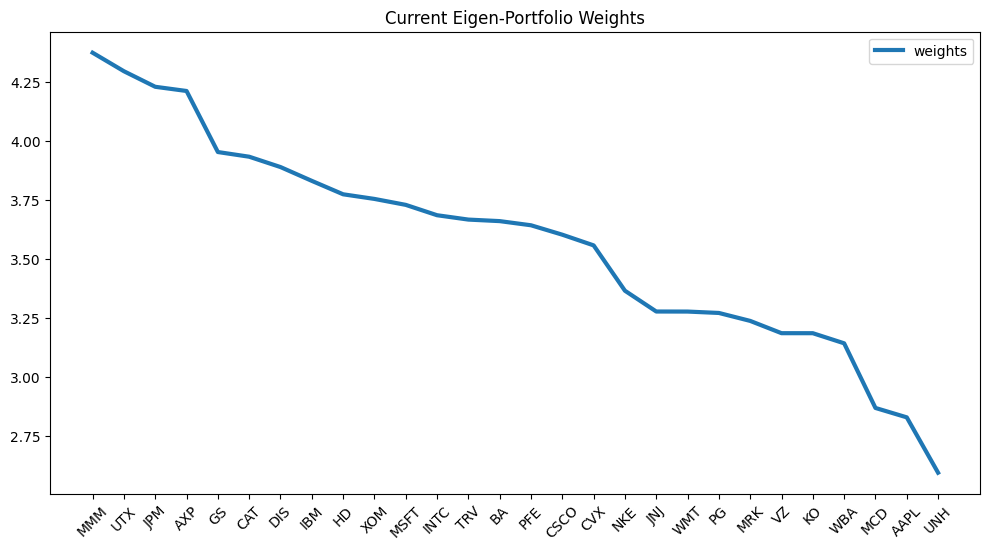

,weights
MMM,4.372
UTX,4.294
JPM,4.228
AXP,4.21
GS,3.952
CAT,3.932
DIS,3.888
IBM,3.83
HD,3.773
XOM,3.753


In [105]:
portfolio = pd.DataFrame


def plotEigen(weights, plot=False, portfolio=portfolio):
    display(type(weights * 100))
    portfolio = pd.DataFrame(weights.copy() * 100)
    portfolio.columns = ["weights"]
    portfolio.index = stock_tickers
    portfolio.sort_values(by=["weights"], ascending=False, inplace=True)
    if plot:
        print("Sum of weights of current eigen-portfolio: %.2f" % np.sum(portfolio))
        portfolio.plot(
            title="Current Eigen-Portfolio Weights",
            figsize=(12, 6),
            xticks=range(len(stock_tickers)),
            rot=45,
            linewidth=3,
        )
        plt.show()
    return portfolio


plotEigen(weights=weights.iloc[:, 0], plot=True)

Current Eigen-Portfolio:
Return = 22.96%
Volatility = 11.34%
Sharpe = 2.02


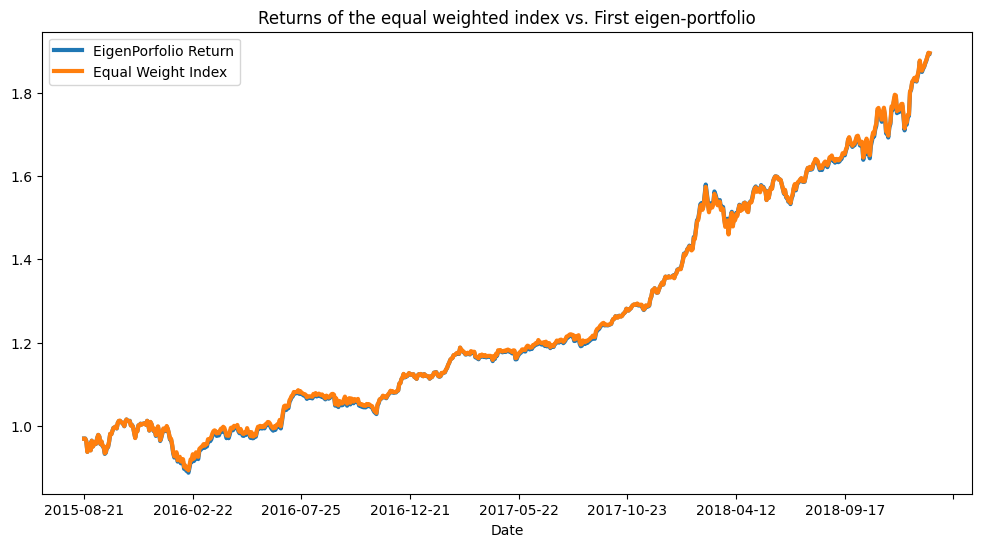

Current Eigen-Portfolio:
Return = -58.25%
Volatility = 92.99%
Sharpe = -0.63


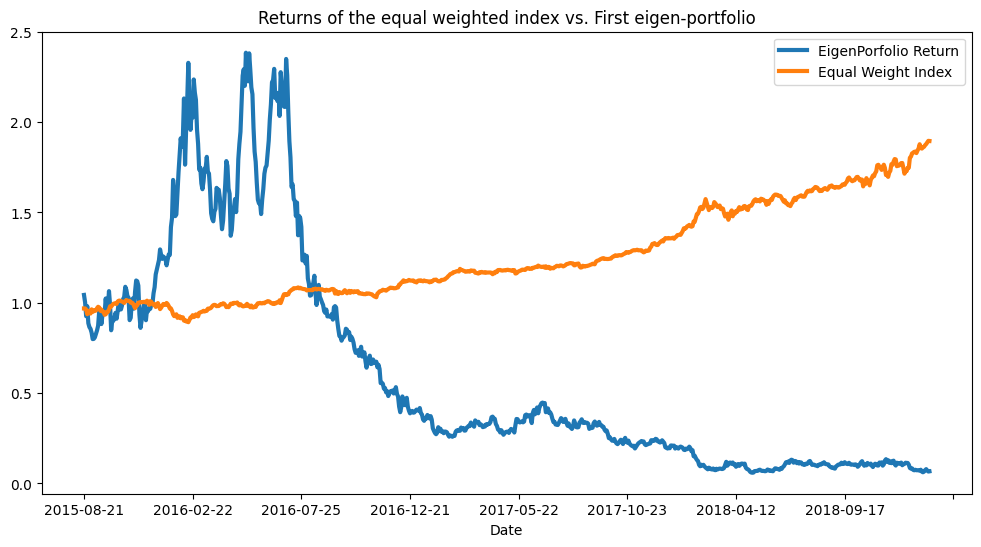

Current Eigen-Portfolio:
Return = -45.12%
Volatility = 104.17%
Sharpe = -0.43


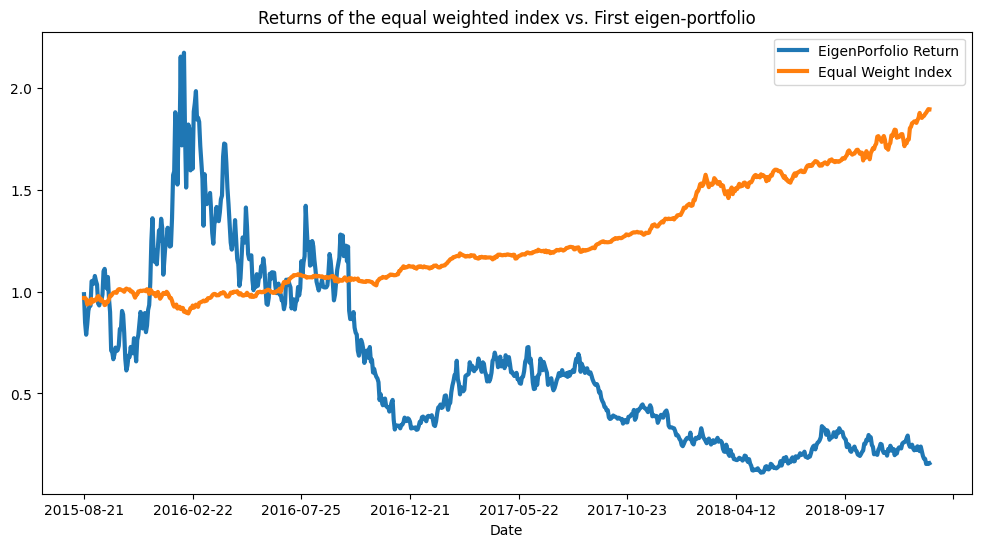

Current Eigen-Portfolio:
Return = -31.09%
Volatility = 95.46%
Sharpe = -0.33


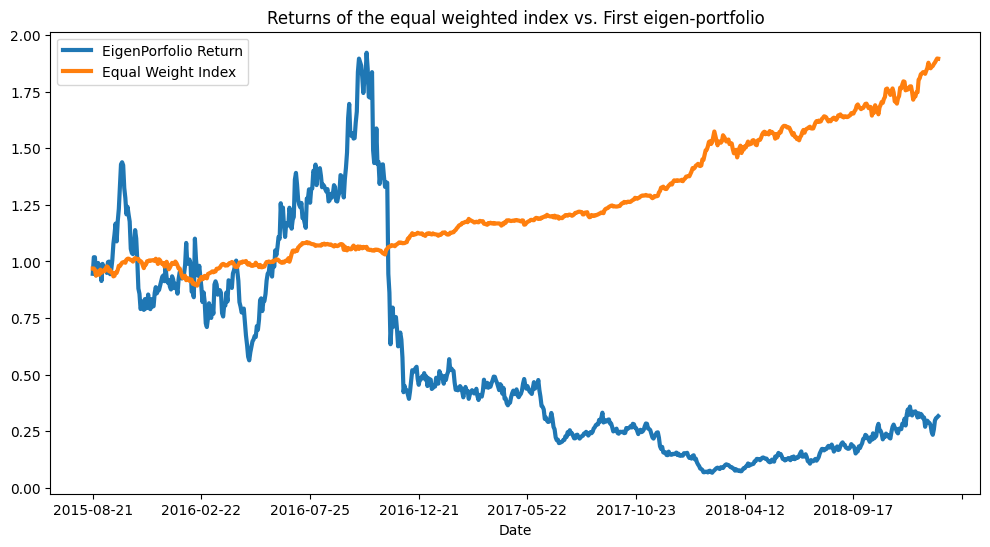

Current Eigen-Portfolio:
Return = 36.15%
Volatility = 116.49%
Sharpe = 0.31


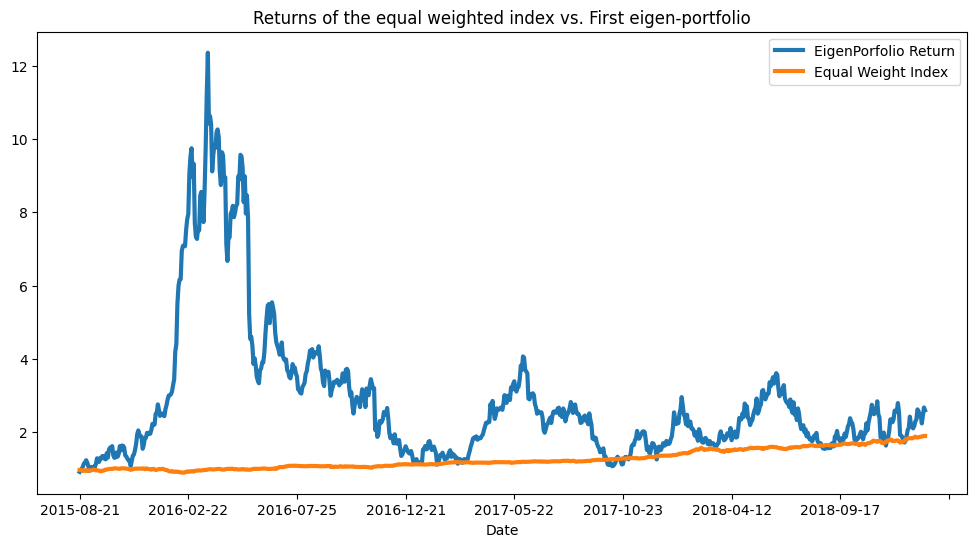

Current Eigen-Portfolio:
Return = 214.87%
Volatility = 108.80%
Sharpe = 1.97


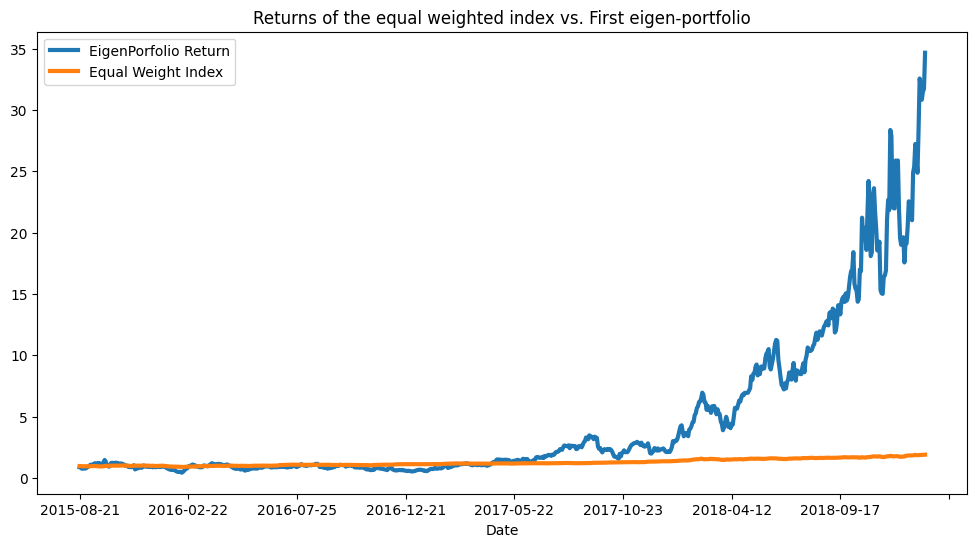

Current Eigen-Portfolio:
Return = -14.43%
Volatility = 250.19%
Sharpe = -0.06


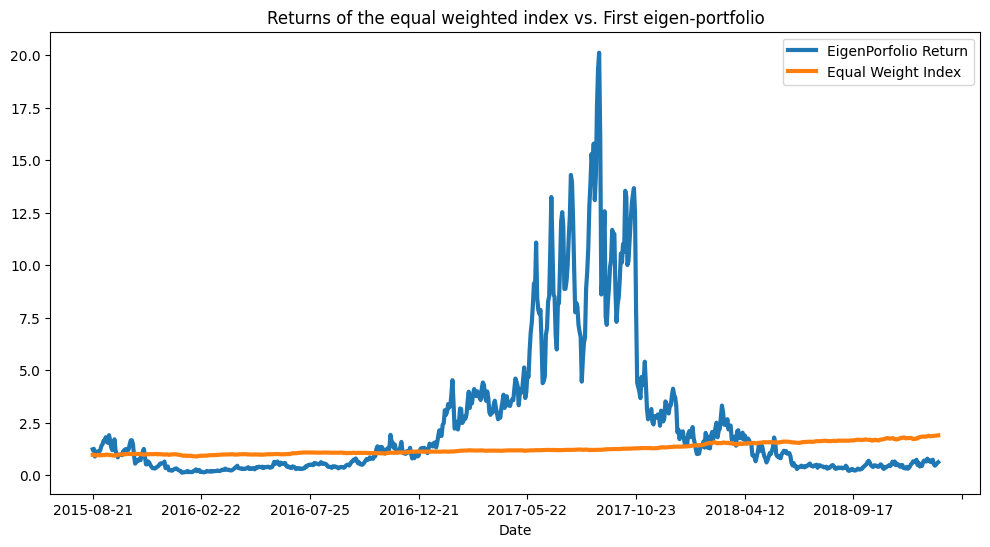

Current Eigen-Portfolio:
Return = -21.17%
Volatility = 49.68%
Sharpe = -0.43


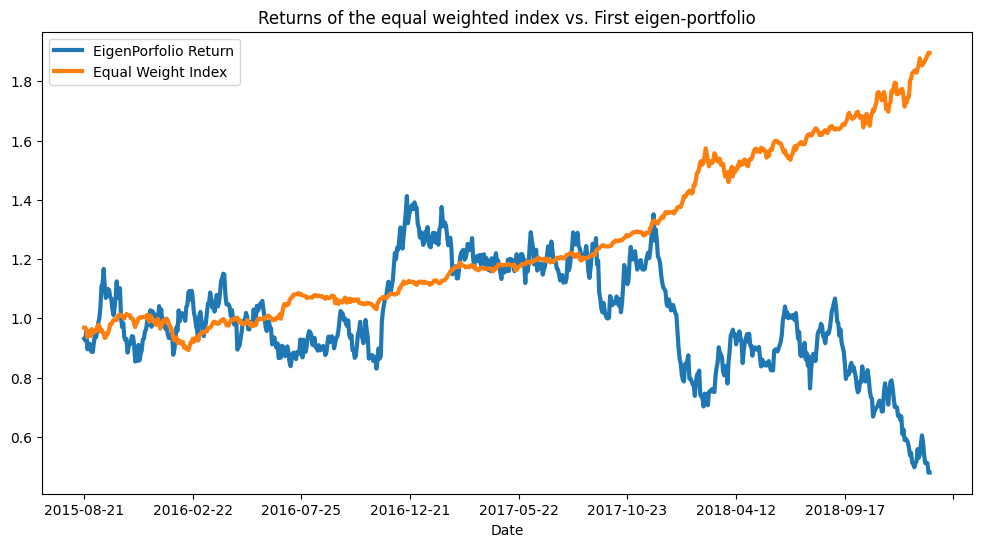

Current Eigen-Portfolio:
Return = -99.99%
Volatility = 376.04%
Sharpe = -0.27


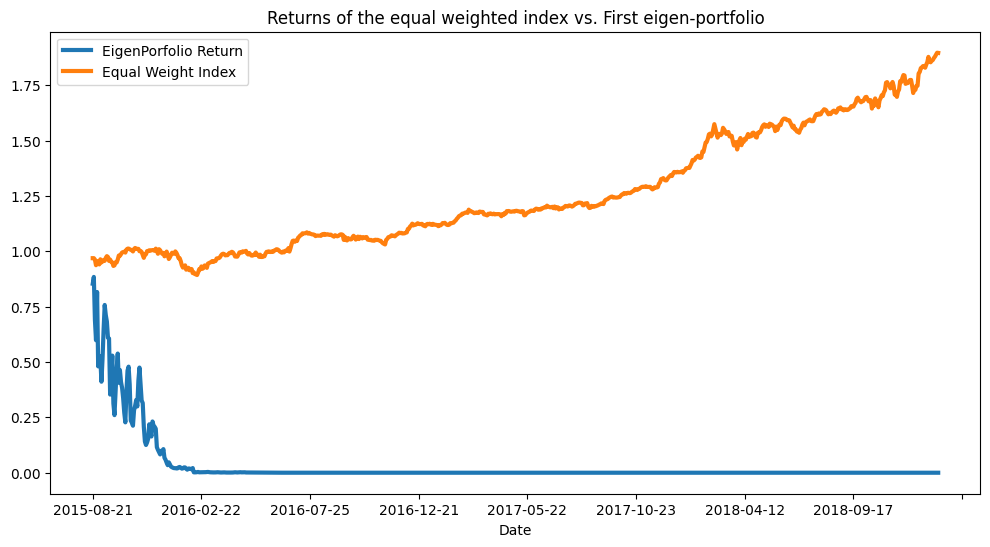

Current Eigen-Portfolio:
Return = -100.00%
Volatility = 538.38%
Sharpe = -0.19


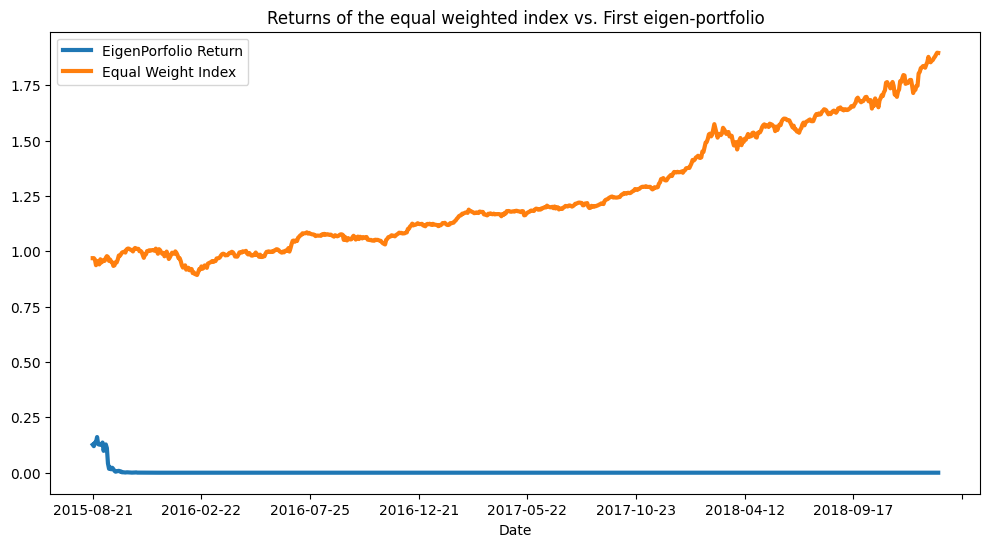

Current Eigen-Portfolio:
Return = -13.13%
Volatility = 58.45%
Sharpe = -0.22


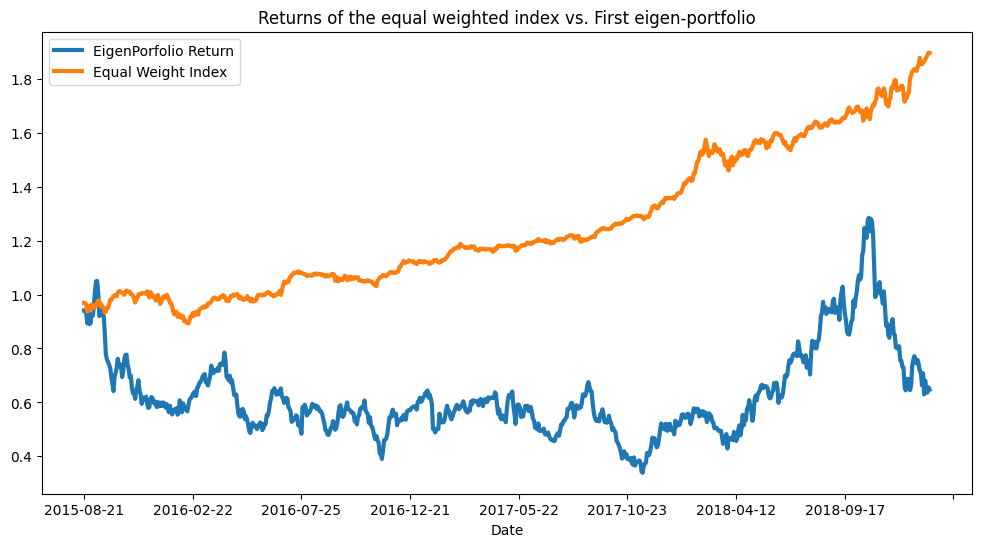

Current Eigen-Portfolio:
Return = nan%
Volatility = 3713.16%
Sharpe = nan


/tmp/ipykernel_15641/2368601429.py:26: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1


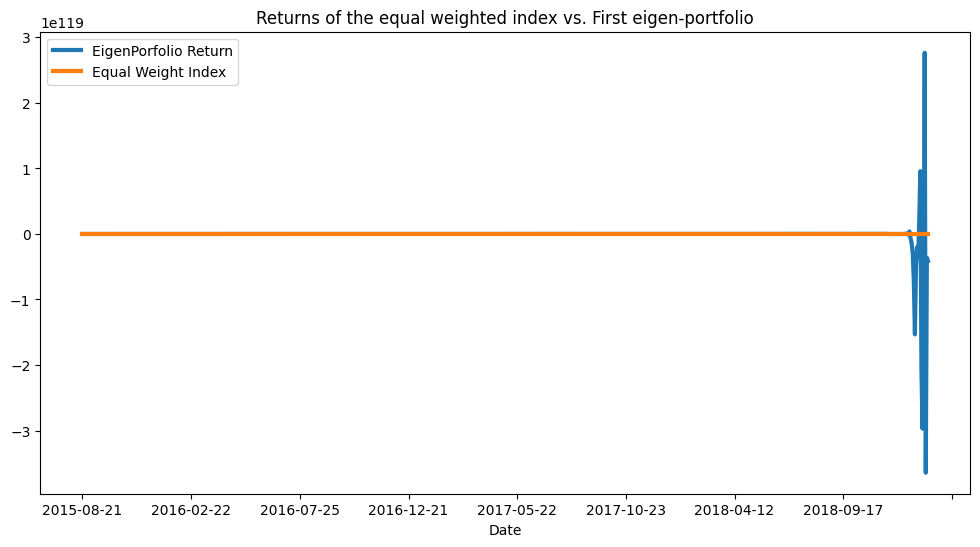

Current Eigen-Portfolio:
Return = -100.00%
Volatility = 449.64%
Sharpe = -0.22


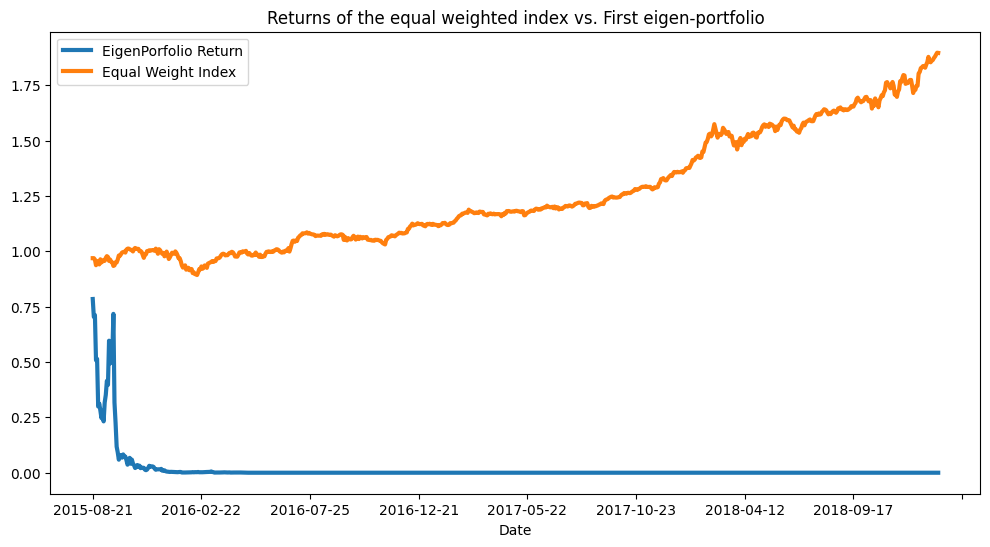

Current Eigen-Portfolio:
Return = -83.14%
Volatility = 220.29%
Sharpe = -0.38


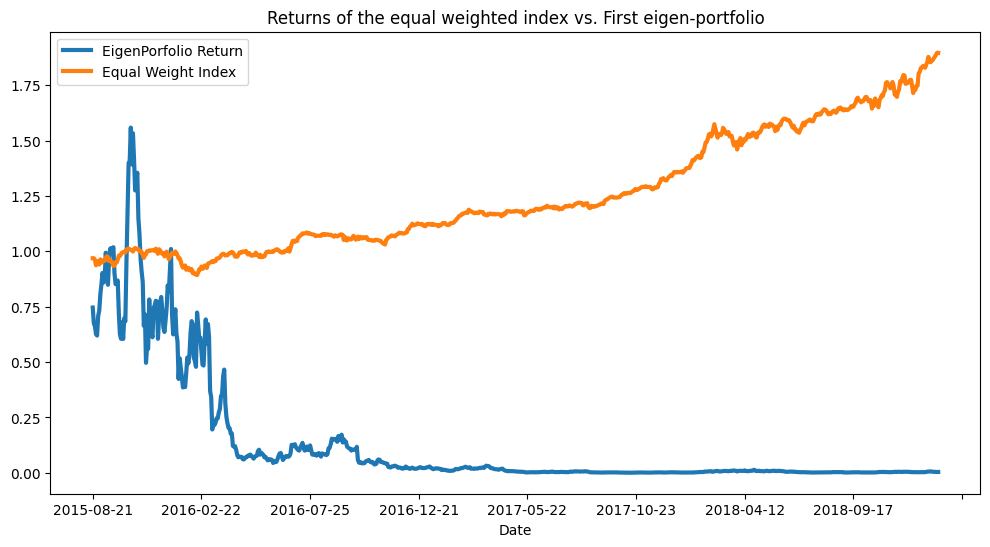

Current Eigen-Portfolio:
Return = 32.33%
Volatility = 121.95%
Sharpe = 0.27


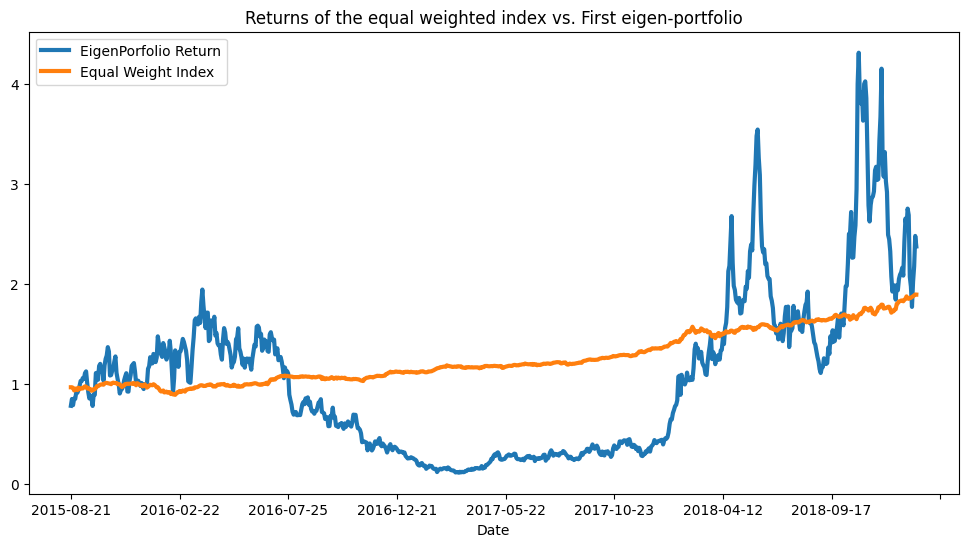

Current Eigen-Portfolio:
Return = -5.12%
Volatility = 204.55%
Sharpe = -0.03


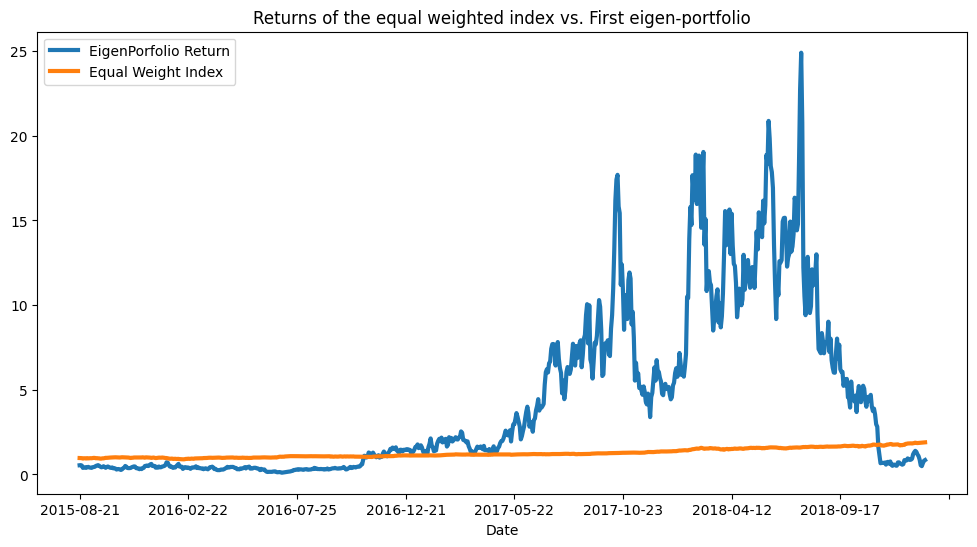

Current Eigen-Portfolio:
Return = -95.44%
Volatility = 230.10%
Sharpe = -0.41


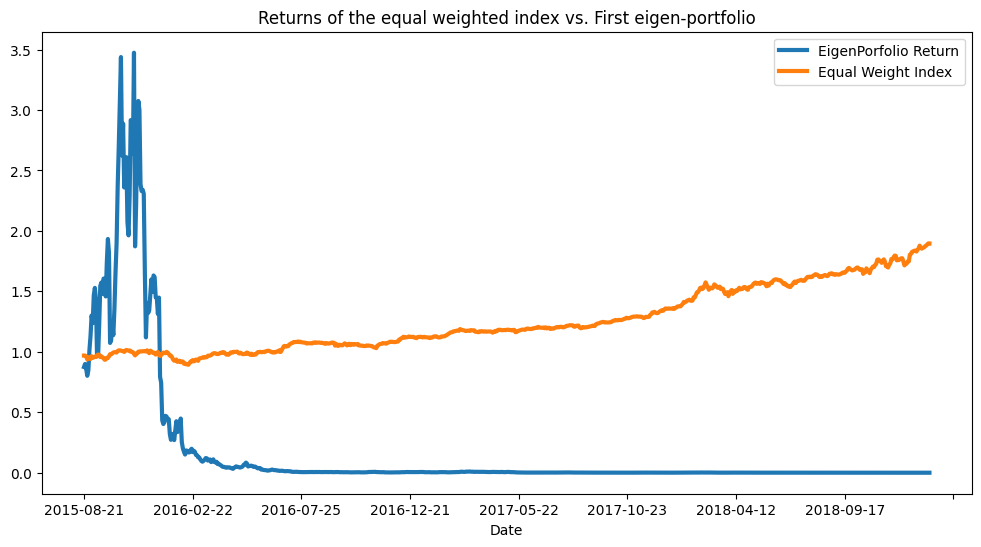

Current Eigen-Portfolio:
Return = nan%
Volatility = 5290.86%
Sharpe = nan


/tmp/ipykernel_15641/2368601429.py:26: RuntimeWarning: invalid value encountered in power
  annualized_return = np.power(np.prod(1 + ts_returns), (1 / n_years)) - 1


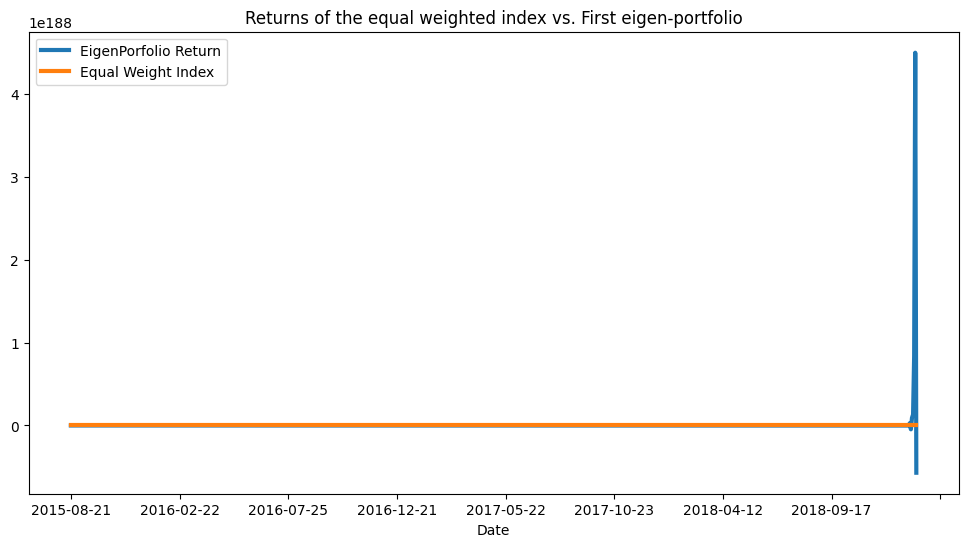

Current Eigen-Portfolio:
Return = -72.96%
Volatility = 206.27%
Sharpe = -0.35


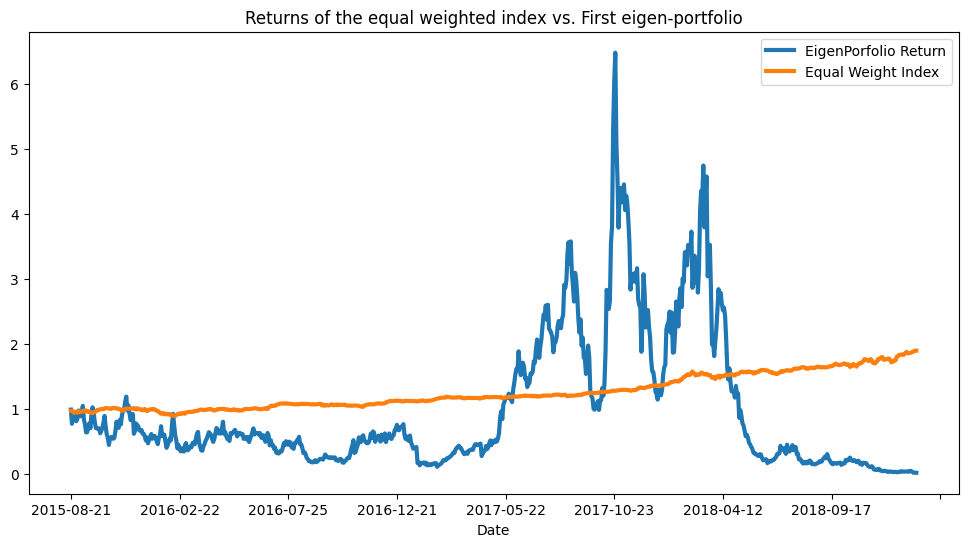

Current Eigen-Portfolio:
Return = -100.00%
Volatility = 534.25%
Sharpe = -0.19


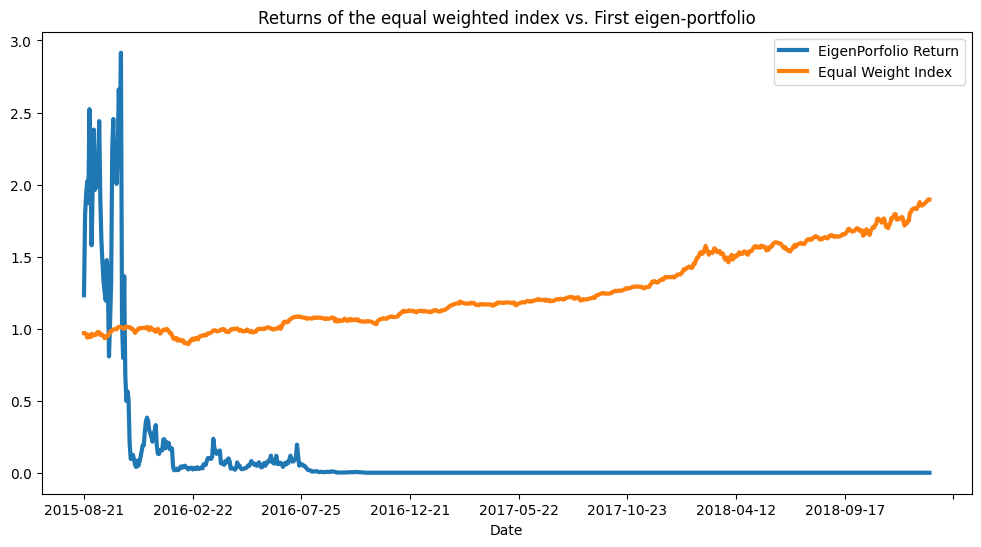

Current Eigen-Portfolio:
Return = -95.31%
Volatility = 168.33%
Sharpe = -0.57


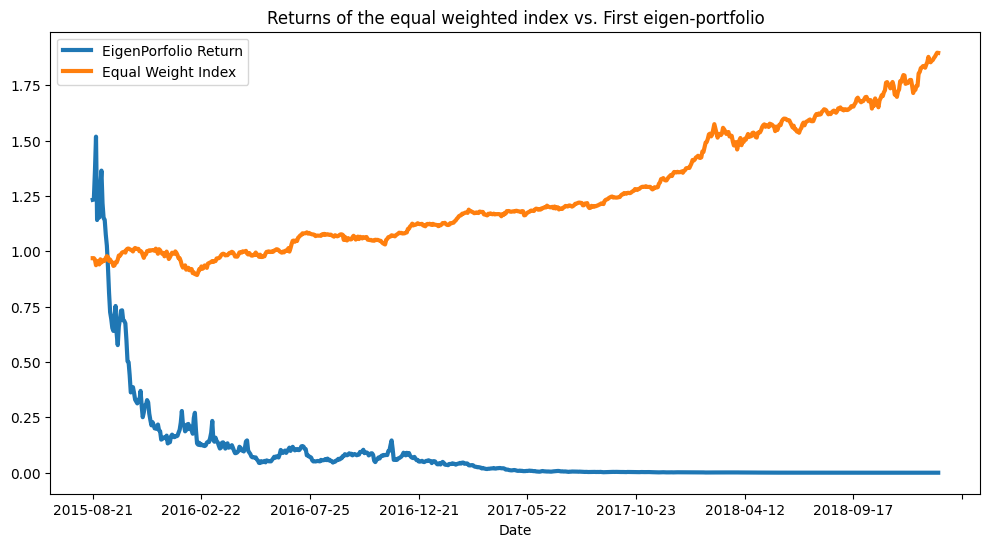

Current Eigen-Portfolio:
Return = 87.77%
Volatility = 83.61%
Sharpe = 1.05


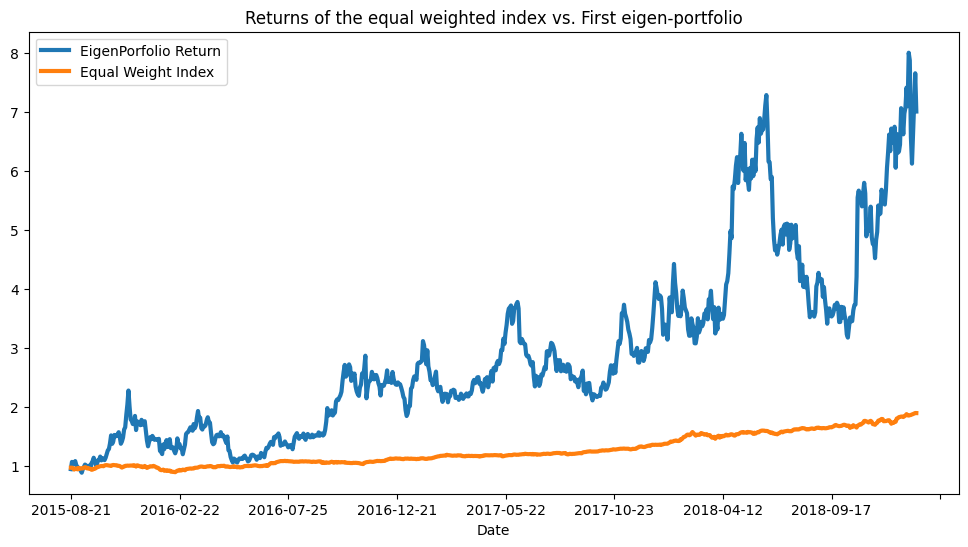

Current Eigen-Portfolio:
Return = -88.04%
Volatility = 215.94%
Sharpe = -0.41


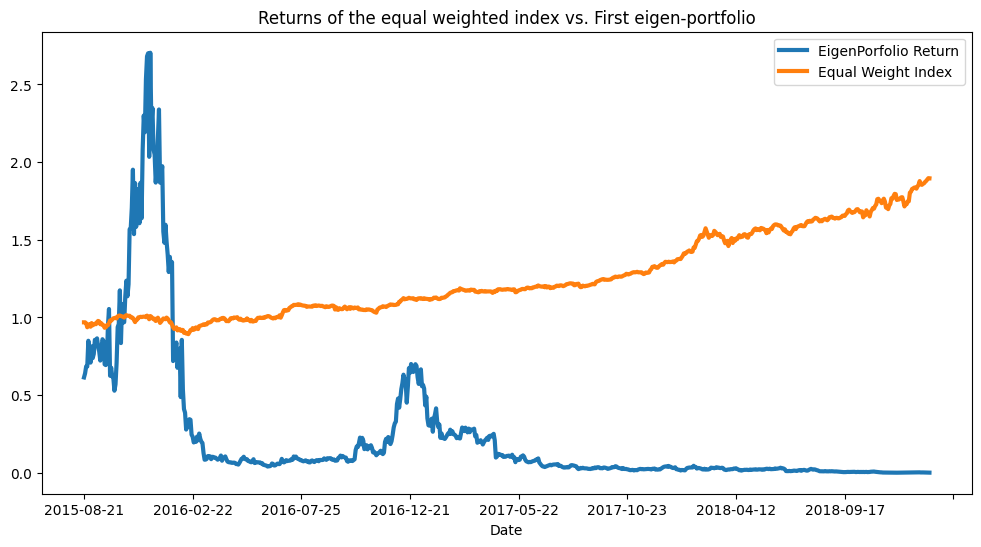

Current Eigen-Portfolio:
Return = -38.62%
Volatility = 134.90%
Sharpe = -0.29


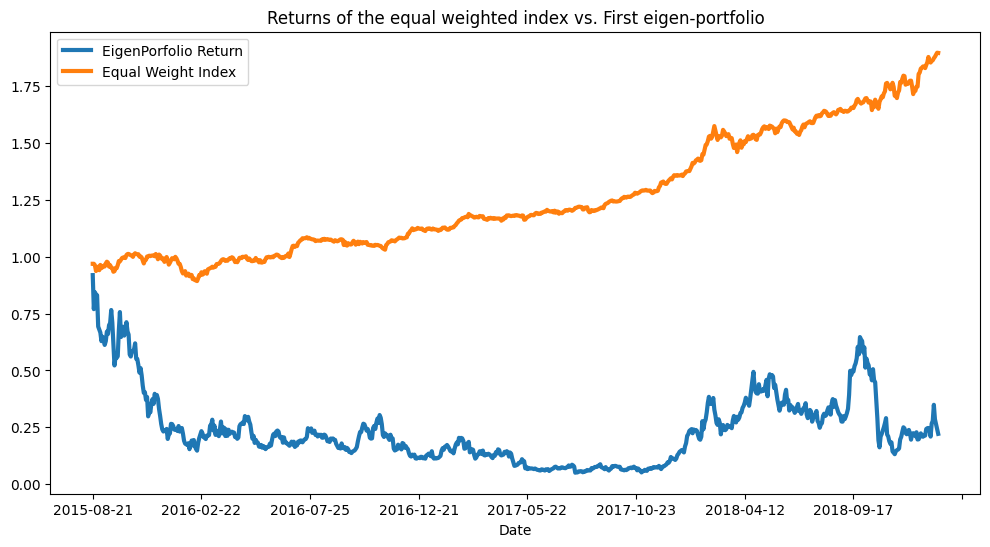

Current Eigen-Portfolio:
Return = -100.00%
Volatility = 778.50%
Sharpe = -0.13


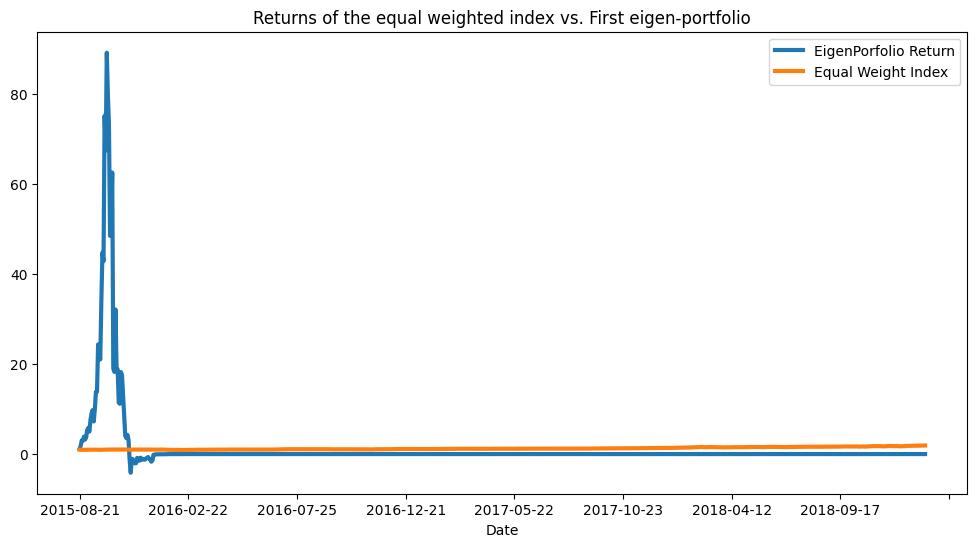

Current Eigen-Portfolio:
Return = -92.87%
Volatility = 330.77%
Sharpe = -0.28


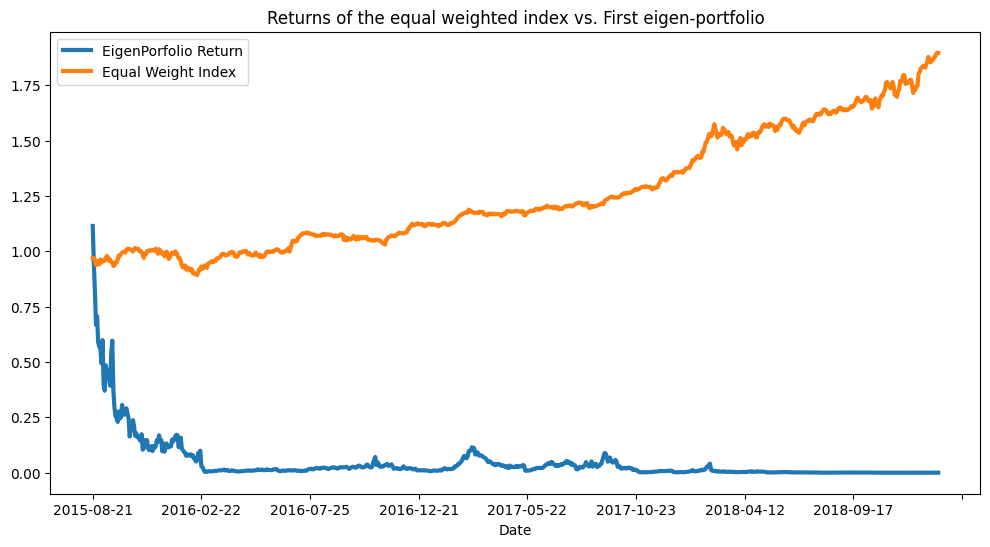

Current Eigen-Portfolio:
Return = -99.27%
Volatility = 235.52%
Sharpe = -0.42


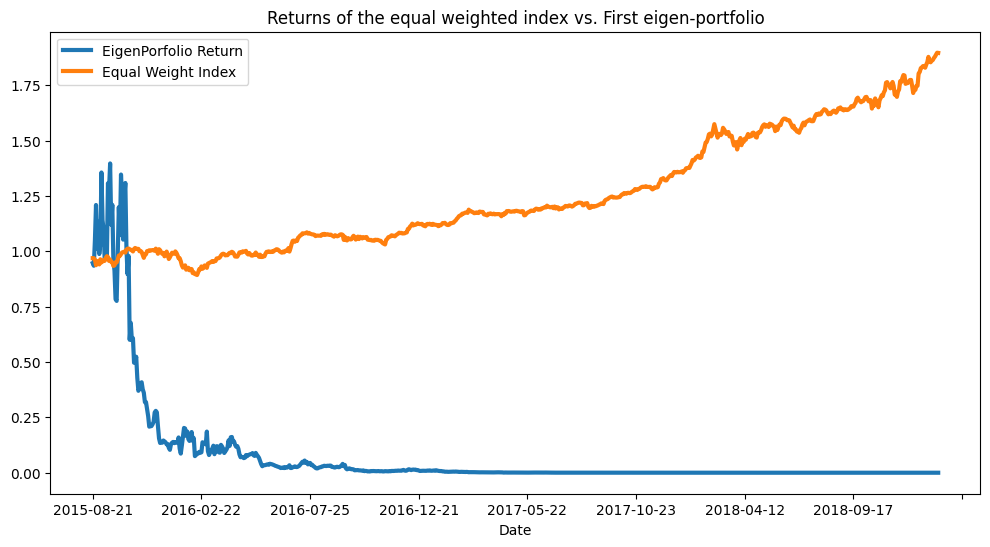

Current Eigen-Portfolio:
Return = 174.15%
Volatility = 180.89%
Sharpe = 0.96


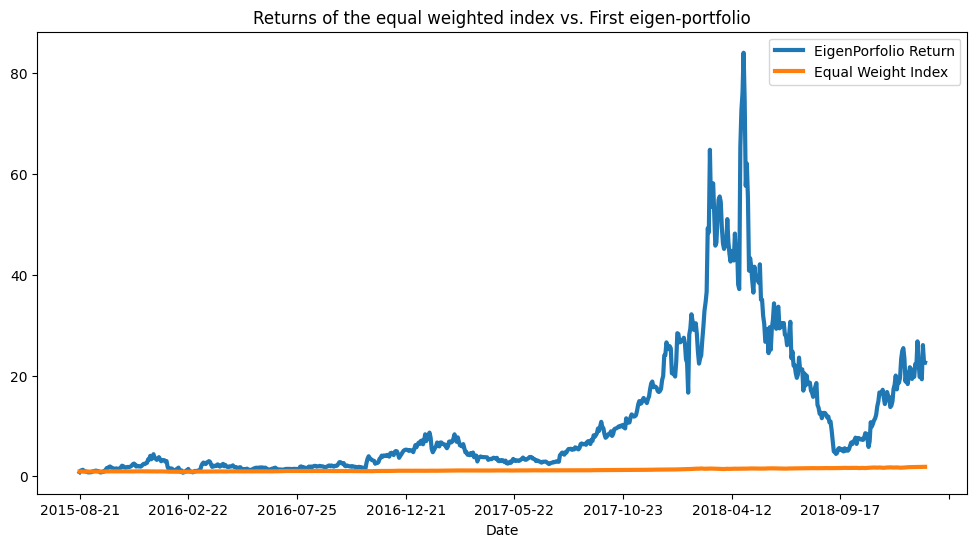

In [123]:
def Backtest(eigen):
    eigen_prtfi = pd.DataFrame(eigen.copy())
    eigen_prtfi.columns = ["weights"]
    eigen_prtfi.index = stock_tickers
    eigen_prtfi.sort_values(by=["weights"], ascending=False, inplace=True)
    eigen_prti_returns = np.dot(X_test_raw, eigen)
    eigen_portfolio_returns = pd.Series(
        eigen_prti_returns.squeeze(), index=X_test_raw.index
    )
    returns, vol, sharpe = sharpe_ratio(eigen_portfolio_returns)
    print(
        "Current Eigen-Portfolio:\nReturn = %.2f%%\nVolatility = %.2f%%\nSharpe = %.2f"
        % (returns * 100, vol * 100, sharpe)
    )
    equal_weight_return = (X_test_raw * (1 / len(pca.components_))).sum(axis=1)
    df_plot = pd.DataFrame(
        {
            "EigenPorfolio Return": eigen_portfolio_returns,
            "Equal Weight Index": equal_weight_return,
        },
        index=X_test_raw.index,
    )
    np.cumprod(df_plot + 1).plot(
        title="Returns of the equal weighted index vs. First eigen-portfolio",
        figsize=(12, 6),
        linewidth=3,
    )
    plt.show()


for i in range(len(pca.components_)):
    Backtest(eigen=weights.iloc[:, i])

# Backtest(eigen=weights.iloc[:, 10])
# Backtest(eigen=weights.iloc[:, 7])
# Backtest(eigen=weights.iloc[:, 5])
# Backtest(eigen=weights.iloc[:, 13])

In [13]:
scaler1 = StandardScaler()
datareturns1 = scaler1.fit_transform(datareturns)

with pd.option_context("display.float_format", "{:.4g}".format):
    datareturns1_df = pd.DataFrame(
        datareturns1, columns=datareturns.columns, index=datareturns.index
    )
    display(datareturns1_df.head())
    display(datareturns1_df.describe())

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.713,0.5656,-2.708,-1.133,-1.041,-0.7871,-1.834,3.569,0.7254,0.9811,0.2904,-1.837,0.6938,2.698,-0.03988,-1.465,2.121,0.02518,-1.936,3.667,-0.1725,1.772,-0.9361,-1.954,0.07602,-0.8363,-1.375,2.942
2000-01-20,-3.564,1.077,3.304,-1.67,-2.834,-0.4458,0.02193,0.987,-2.415,-1.897,-1.069,-1.243,-0.4133,-2.664,0.344,-0.0769,0.3356,1.608,-0.7332,-1.816,-1.421,-2.742,-0.4757,-1.916,1.654,0.241,-0.987,-0.03575
2000-02-02,-1.687,-1.913,-0.8058,1.298,0.3107,-0.5821,-2.018,-3.228,2.527,0.5989,-0.1017,-1.443,2.735,-0.8034,0.5488,-1.02,-2.925,0.03228,-1.57,1.136,-2.313,-1.019,-3.905,0.03663,1.739,-0.3887,-0.5012,0.3032
2000-02-03,-0.8808,-0.5574,2.291,-1.869,-1.689,-1.187,2.023,-2.161,1.213,-1.489,-3.88,-0.3219,2.742,2.445,-2.622,0.5821,-1.368,-0.714,2.012,0.6318,-0.8952,-0.971,-3.592,-1.288,-0.6841,-1.289,-0.01997,-0.1915
2000-02-04,-2.758,-0.6428,2.284,0.8093,-0.05329,-2.84,1.649,1.882,0.4513,-1.587,-0.5155,0.682,-1.167,0.3195,-1.647,-1.078,0.2595,-1.321,2.049,-1.904,0.2601,-3.521,0.3156,-2.466,1.621,0.149,-3.25,0.7704


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
count,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892
mean,-2.373e-17,9.128e-18,4.564e-18,-1.369e-17,-2.328e-17,1.369e-17,2.191e-17,-2.465e-17,-2.191e-17,-2.465e-17,9.128e-19,7.303e-18,1.78e-17,-4.564e-18,2.921e-17,-3.651e-18,-1.871e-17,-7.303e-18,3.104e-17,2.191e-17,5.477e-18,-1.187e-17,-2.099e-17,-1.826e-17,0,-1.826e-18,-1.095e-17,1.095e-17
std,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
min,-3.924,-4.357,-3.726,-3.698,-3.688,-3.796,-4.359,-4.013,-4.054,-3.821,-4.119,-3.963,-4.212,-4.122,-3.635,-4.431,-3.916,-3.986,-4.228,-3.94,-3.9,-4.096,-4.302,-3.814,-3.964,-3.993,-3.998,-3.807
25%,-0.5513,-0.4935,-0.5312,-0.5965,-0.5685,-0.5927,-0.4946,-0.5581,-0.5459,-0.593,-0.5686,-0.5346,-0.5765,-0.572,-0.537,-0.4991,-0.5666,-0.5809,-0.5606,-0.5735,-0.5639,-0.5583,-0.5452,-0.5682,-0.562,-0.5844,-0.5611,-0.5998
50%,0.001367,-0.007736,-0.02331,-0.01092,-0.01676,0.01636,0.002489,0.009481,0.00187,-0.01357,0.004714,-0.008079,-0.02077,0.01431,-0.02111,-0.006075,0.01065,-0.0167,-0.02632,-0.01473,-0.02502,-0.01429,-0.0004608,-0.01033,-0.01737,0.01146,0.0002637,-0.02222
75%,0.5882,0.5269,0.5397,0.6064,0.5788,0.6062,0.5403,0.558,0.5583,0.5962,0.5834,0.5394,0.5492,0.5684,0.569,0.5105,0.5695,0.5795,0.552,0.5539,0.5648,0.5458,0.5461,0.5624,0.5621,0.5786,0.5573,0.5889
max,3.949,4.324,3.924,3.803,3.808,3.714,4.32,4.044,4.043,3.721,4.251,3.946,4.128,4.05,4.086,4.462,4.022,4.138,4.127,4.057,3.87,4.172,4.317,3.982,4.003,3.753,4.1,3.757


In [14]:
scaler = StandardScaler()
rescaledDataset = pd.DataFrame(
    scaler.fit_transform(datareturns),
    columns=datareturns.columns,
    index=datareturns.index,
)
with pd.option_context("display.float_format", "{:.4g}".format):
    display(rescaledDataset.head())
    display(rescaledDataset.describe())

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.713,0.5656,-2.708,-1.133,-1.041,-0.7871,-1.834,3.569,0.7254,0.9811,0.2904,-1.837,0.6938,2.698,-0.03988,-1.465,2.121,0.02518,-1.936,3.667,-0.1725,1.772,-0.9361,-1.954,0.07602,-0.8363,-1.375,2.942
2000-01-20,-3.564,1.077,3.304,-1.67,-2.834,-0.4458,0.02193,0.987,-2.415,-1.897,-1.069,-1.243,-0.4133,-2.664,0.344,-0.0769,0.3356,1.608,-0.7332,-1.816,-1.421,-2.742,-0.4757,-1.916,1.654,0.241,-0.987,-0.03575
2000-02-02,-1.687,-1.913,-0.8058,1.298,0.3107,-0.5821,-2.018,-3.228,2.527,0.5989,-0.1017,-1.443,2.735,-0.8034,0.5488,-1.02,-2.925,0.03228,-1.57,1.136,-2.313,-1.019,-3.905,0.03663,1.739,-0.3887,-0.5012,0.3032
2000-02-03,-0.8808,-0.5574,2.291,-1.869,-1.689,-1.187,2.023,-2.161,1.213,-1.489,-3.88,-0.3219,2.742,2.445,-2.622,0.5821,-1.368,-0.714,2.012,0.6318,-0.8952,-0.971,-3.592,-1.288,-0.6841,-1.289,-0.01997,-0.1915
2000-02-04,-2.758,-0.6428,2.284,0.8093,-0.05329,-2.84,1.649,1.882,0.4513,-1.587,-0.5155,0.682,-1.167,0.3195,-1.647,-1.078,0.2595,-1.321,2.049,-1.904,0.2601,-3.521,0.3156,-2.466,1.621,0.149,-3.25,0.7704


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
count,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892,3892
mean,-2.373e-17,9.128e-18,4.564e-18,-1.369e-17,-2.328e-17,1.369e-17,2.191e-17,-2.465e-17,-2.191e-17,-2.465e-17,9.128e-19,7.303e-18,1.78e-17,-4.564e-18,2.921e-17,-3.651e-18,-1.871e-17,-7.303e-18,3.104e-17,2.191e-17,5.477e-18,-1.187e-17,-2.099e-17,-1.826e-17,0,-1.826e-18,-1.095e-17,1.095e-17
std,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
min,-3.924,-4.357,-3.726,-3.698,-3.688,-3.796,-4.359,-4.013,-4.054,-3.821,-4.119,-3.963,-4.212,-4.122,-3.635,-4.431,-3.916,-3.986,-4.228,-3.94,-3.9,-4.096,-4.302,-3.814,-3.964,-3.993,-3.998,-3.807
25%,-0.5513,-0.4935,-0.5312,-0.5965,-0.5685,-0.5927,-0.4946,-0.5581,-0.5459,-0.593,-0.5686,-0.5346,-0.5765,-0.572,-0.537,-0.4991,-0.5666,-0.5809,-0.5606,-0.5735,-0.5639,-0.5583,-0.5452,-0.5682,-0.562,-0.5844,-0.5611,-0.5998
50%,0.001367,-0.007736,-0.02331,-0.01092,-0.01676,0.01636,0.002489,0.009481,0.00187,-0.01357,0.004714,-0.008079,-0.02077,0.01431,-0.02111,-0.006075,0.01065,-0.0167,-0.02632,-0.01473,-0.02502,-0.01429,-0.0004608,-0.01033,-0.01737,0.01146,0.0002637,-0.02222
75%,0.5882,0.5269,0.5397,0.6064,0.5788,0.6062,0.5403,0.558,0.5583,0.5962,0.5834,0.5394,0.5492,0.5684,0.569,0.5105,0.5695,0.5795,0.552,0.5539,0.5648,0.5458,0.5461,0.5624,0.5621,0.5786,0.5573,0.5889
max,3.949,4.324,3.924,3.803,3.808,3.714,4.32,4.044,4.043,3.721,4.251,3.946,4.128,4.05,4.086,4.462,4.022,4.138,4.127,4.057,3.87,4.172,4.317,3.982,4.003,3.753,4.1,3.757


In [12]:
rescaledDataset.head(2)

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2000-01-11,-1.713,0.5656,-2.708,-1.133,-1.041,-0.7871,-1.834,3.569,0.7254,0.9811,0.2904,-1.837,0.6938,2.698,-0.03988,-1.465,2.121,0.02518,-1.936,3.667,-0.1725,1.772,-0.9361,-1.954,0.07602,-0.8363,-1.375,2.942
2000-01-20,-3.564,1.077,3.304,-1.67,-2.834,-0.4458,0.02193,0.987,-2.415,-1.897,-1.069,-1.243,-0.4133,-2.664,0.344,-0.0769,0.3356,1.608,-0.7332,-1.816,-1.421,-2.742,-0.4757,-1.916,1.654,0.241,-0.987,-0.03575


In [17]:
percentage = int(len(rescaledDataset) * 0.8)

X_train = rescaledDataset[:percentage]
X_test = rescaledDataset[percentage:]
stock_tickers = rescaledDataset.columns.values
n_tickers = len(stock_tickers)
print(n_tickers)
print(X_train.shape)
print(X_test.shape)

28
(3113, 28)
(779, 28)


In [47]:
X_train1 = X_train[:107]
random_state = 9527
pca = PCA(svd_solver="full", random_state=random_state)
pca.fit(X_train1)
pca.components_.shape

(28, 28)

In [26]:
transformed_X_train = X_train @ pca.components_.T
transformed_X_train.columns = X_train.columns
print(transformed_X_train[0:3])

              MMM     AXP   AAPL      BA     CAT    CVX   CSCO     KO    DIS    XOM     GS     HD     IBM    INTC    JNJ   JPM     MCD     MRK    MSFT     NKE    PFE      PG     TRV     UTX     UNH      VZ    WMT    WBA
Date                                                                                                                                                                                                                       
2000-01-11 0.3169  -2.891  1.727 -0.3211  -2.202 0.6612 -0.804 -2.265 0.7433  0.627    2.3 -4.391   1.823   3.343 0.9023 1.102 -0.4129 -0.2753    1.24  0.5846 -1.676  0.1527 -0.2478  -2.593  -1.075   2.033 -1.597  1.052
2000-01-20  4.056 -0.1768  1.727 -0.8363   2.546 -1.418 -1.744 -3.296   1.87 -1.684 -2.387 -1.158 -0.1569 -0.3302 -1.213 1.393  0.3624   1.181 -0.3831  -2.145 0.7589 -0.2211   2.817   1.925   0.652 -0.3862 0.5316 -1.071
2000-02-02  2.882  0.5363 -1.628 -0.3215 -0.4044 -2.866  2.123  2.005 -1.134  2.213  -2.51   -2.1   1.992  0.7849 0.8431

In [48]:
transformed_X_train = X_train @ pca.components_.T
transformed_X_train.columns = X_train.columns
print(transformed_X_train[0:3])

              MMM     AXP   AAPL      BA     CAT    CVX   CSCO     KO    DIS    XOM     GS     HD     IBM    INTC    JNJ   JPM     MCD     MRK    MSFT     NKE    PFE      PG     TRV     UTX     UNH      VZ    WMT    WBA
Date                                                                                                                                                                                                                       
2000-01-11 0.3169  -2.891  1.727 -0.3211  -2.202 0.6612 -0.804 -2.265 0.7433  0.627    2.3 -4.391   1.823   3.343 0.9023 1.102 -0.4129 -0.2753    1.24  0.5846 -1.676  0.1527 -0.2478  -2.593  -1.075   2.033 -1.597  1.052
2000-01-20  4.056 -0.1768  1.727 -0.8363   2.546 -1.418 -1.744 -3.296   1.87 -1.684 -2.387 -1.158 -0.1569 -0.3302 -1.213 1.393  0.3624   1.181 -0.3831  -2.145 0.7589 -0.2211   2.817   1.925   0.652 -0.3862 0.5316 -1.071
2000-02-02  2.882  0.5363 -1.628 -0.3215 -0.4044 -2.866  2.123  2.005 -1.134  2.213  -2.51   -2.1   1.992  0.7849 0.8431

In [49]:
pca1 = PCA(svd_solver="full", random_state=random_state)
transformed_X_train1 = pca1.fit_transform(X_train)
transformed_X_train1_df = pd.DataFrame(
    transformed_X_train1, columns=X_train.columns, index=X_train.index
)
print(transformed_X_train1_df[0:3])

              MMM     AXP   AAPL      BA     CAT    CVX    CSCO     KO    DIS    XOM     GS     HD     IBM    INTC    JNJ    JPM     MCD     MRK    MSFT     NKE    PFE      PG     TRV     UTX     UNH      VZ    WMT    WBA
Date                                                                                                                                                                                                                         
2000-01-11 0.2866  -2.891  1.732 -0.3219  -2.206 0.6554 -0.8069 -2.257 0.7344 0.6324  2.309 -4.384   1.822   3.344 0.8917    1.1 -0.4098 -0.2765   1.238  0.5745 -1.669  0.1463 -0.2494  -2.597  -1.077   2.028 -1.592  1.044
2000-01-20  4.026 -0.1769  1.732 -0.8371   2.542 -1.424  -1.747 -3.287  1.861 -1.679 -2.377 -1.151 -0.1577 -0.3294 -1.224  1.391  0.3655    1.18 -0.3847  -2.155 0.7662 -0.2274   2.816    1.92  0.6499 -0.3918 0.5363 -1.079
2000-02-02  2.852  0.5361 -1.623 -0.3223 -0.4088 -2.872    2.12  2.014 -1.143  2.218   -2.5 -2.093   1.991  0.78

In [50]:
assert_almost_equal(pca.explained_variance_, pca1.explained_variance_)
assert_almost_equal(pca.components_[0], pca1.components_[0])
print(pca.components_[0])
print(pca1.components_[0])
print(transformed_X_train.iloc[0].values)
print(transformed_X_train1_df.iloc[0].values)
assert_almost_equal(
    transformed_X_train.iloc[0].values, transformed_X_train1_df.iloc[0].values
)

[-0.228 -0.228 -0.153 -0.19 -0.202 -0.178 -0.195 -0.168 -0.208 -0.193 ... -0.194 -0.171 -0.19 -0.168 -0.198 -0.227 -0.138 -0.167 -0.169
 -0.161]
[-0.228 -0.228 -0.153 -0.19 -0.202 -0.178 -0.195 -0.168 -0.208 -0.193 ... -0.194 -0.171 -0.19 -0.168 -0.198 -0.227 -0.138 -0.167 -0.169
 -0.161]
[0.317 -2.89 1.73 -0.321 -2.2 0.661 -0.804 -2.27 0.743 0.627 ... 1.24 0.585 -1.68 0.153 -0.248 -2.59 -1.07 2.03 -1.6 1.05]
[0.287 -2.89 1.73 -0.322 -2.21 0.655 -0.807 -2.26 0.734 0.632 ... 1.24 0.575 -1.67 0.146 -0.249 -2.6 -1.08 2.03 -1.59 1.04]


AssertionError: 
Arrays are not almost equal to 7 decimals

Mismatched elements: 28 / 28 (100%)
Max absolute difference: 0.0303
Max relative difference: 0.106
 x: array([0.317, -2.89, 1.73, -0.321, -2.2, 0.661, -0.804, -2.27, 0.743, 0.627, ..., 1.24, 0.585, -1.68, 0.153, -0.248, -2.59, -1.07, 2.03,
       -1.6, 1.05])
 y: array([0.287, -2.89, 1.73, -0.322, -2.21, 0.655, -0.807, -2.26, 0.734, 0.632, ..., 1.24, 0.575, -1.67, 0.146, -0.249, -2.6, -1.08, 2.03,
       -1.59, 1.04])

In [47]:
print(pca.mean_.shape)
print(pca.mean_)

(28,)
[-0.0112 -0.00304 0.00365 -0.0191 -0.00613 -0.00544 -0.00794 -0.00595 0.000613 0.00469 ... -0.0174 -0.00258 -0.00463 -0.00155 -0.00503
 -0.00618 -0.0069 -0.00174 -0.00948 -0.000257]


In [50]:
bb = X_train @ pca.components_.T
pca1 = PCA(n_components=10)
aa = pca1.fit_transform(X_train)

In [51]:
print(aa[:5])
print(bb[:5])

[[0.287 -2.89 1.78 -0.364 -2.25 0.765 -0.55 -2.16 1.11 0.882]
 [4.03 -0.167 1.61 -0.842 2.5 -1.2 -1.76 -2.54 2.16 -1.5]
 [2.85 0.539 -1.58 -0.31 -0.407 -3.09 1.82 1.6 -1.52 2.53]
 [2.52 5.55 2.93 -3.58 -0.783 -1.33 1.67 -0.00965 0.644 1.7]
 [2.32 3.31 1.94 -1.05 1.08 -2 -2.79 -1.36 -0.301 0.197]]
                0       1      2       3       4      5       6       7       8       9
Date                                                                                   
2000-01-11 0.3169   -2.91  1.729 -0.2704  -2.193 0.6762 -0.7534 -0.4249   1.008 -0.8232
2000-01-20  4.056 -0.1844  1.732 -0.7915   2.553 -1.385  -1.657 -0.2882   4.582  -0.561
2000-02-02  2.882  0.5414 -1.677 -0.4199 -0.3704 -3.026   2.052  0.2142  -1.854  -2.899
2000-02-03  2.555   5.549  2.948  -3.604 -0.7216 -1.333   1.842   0.452 0.03774  -1.739
2000-02-04  2.353   3.306  1.993 -0.9539   1.071 -2.049  -3.032  -1.189    1.36   -1.19


0    0.3703
1    0.4275
2     0.471
3    0.5108
4     0.546
5    0.5774
6    0.6065
7    0.6344
8    0.6618
9    0.6871
10   0.7116
11   0.7354
12   0.7578
13    0.779
14   0.7993
15   0.8195
16   0.8388
17   0.8579
18    0.876
19   0.8938
20   0.9105
21   0.9262
22   0.9415
23   0.9559
24   0.9701
25   0.9824
26   0.9932
27        1
dtype: float64

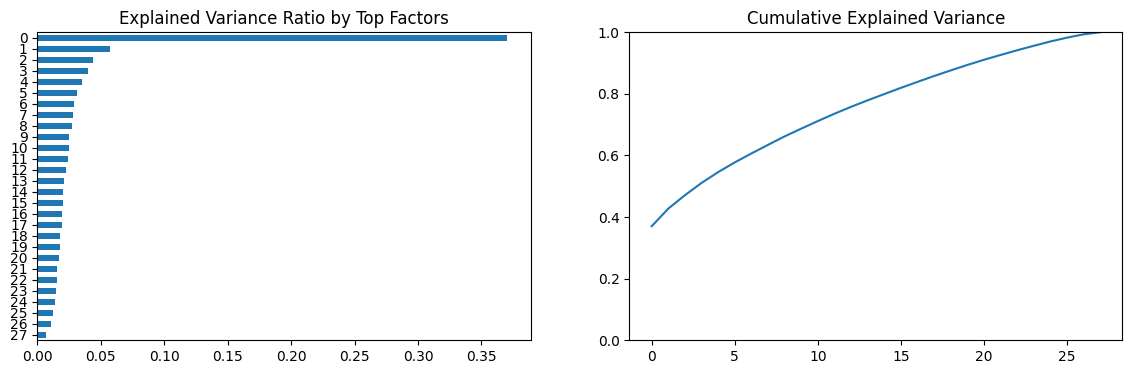

In [15]:
_, axes = plt.subplots(ncols=2, figsize=(14, 4))
Series1 = pd.Series(pca.explained_variance_ratio_).sort_values(ascending=True)
Series2 = pd.Series(np.cumsum(pca.explained_variance_ratio_))
Series1.plot.barh(ax=axes[0], title="Explained Variance Ratio by Top Factors")
Series2.plot(ylim=(0, 1), ax=axes[1], title="Cumulative Explained Variance")
display(Series2)

In [16]:
pcaDF = pd.DataFrame(pca.components_, columns=dataset.columns)
display(pcaDF.head())
display(pcaDF.sum(axis=1))

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
0,-0.2278,-0.2284,-0.153,-0.1897,-0.202,-0.1781,-0.1951,-0.1685,-0.2082,-0.1931,-0.2088,-0.2023,-0.1994,-0.1952,-0.1669,-0.2281,-0.1515,-0.1699,-0.1937,-0.1712,-0.1899,-0.1681,-0.1976,-0.2266,-0.1382,-0.1669,-0.169,-0.1607
1,-0.02391,0.09044,0.33,0.01233,0.08383,-0.1272,0.3545,-0.2439,0.08993,-0.1487,0.1626,0.01159,0.1786,0.3287,-0.344,0.1262,-0.1069,-0.3007,0.208,0.002377,-0.2291,-0.2955,-0.04629,0.04123,-0.1661,-0.07985,-0.07344,-0.1218
2,-0.133,-0.007417,0.05409,-0.1605,-0.2752,-0.5109,0.122,0.1304,0.05387,-0.4648,-0.1101,0.2025,0.08071,0.1514,0.1035,-0.07215,0.1034,0.1448,0.1125,0.06629,0.1177,0.1426,-0.0348,-0.1712,-0.06741,0.1385,0.3181,0.171
3,0.02045,0.2953,-0.2898,0.1245,0.04404,-0.2164,-0.2238,-0.1491,0.05739,-0.2498,0.3084,0.2367,-0.2128,-0.2727,-0.1457,0.3352,0.05164,-0.1573,-0.2403,0.161,-0.1453,-0.08537,0.2392,0.07116,0.04985,-0.0339,0.09672,0.08371
4,-0.1289,0.177,-0.04677,-0.1659,-0.1526,-0.04915,0.04934,-0.1405,0.0121,-0.04928,0.2924,-0.1725,-0.02516,0.03232,0.1672,0.2969,-0.3471,0.3766,0.05859,-0.274,0.3413,-0.1676,0.1261,-0.1477,0.07893,0.1284,-0.2238,-0.2072


0       -5.248
1      -0.2871
2       0.2057
3       -0.247
4      -0.1612
5      -0.1871
6     -0.09652
7      -0.2363
8        0.117
9     -0.05035
10     -0.2144
11     0.03264
12     0.04344
13      0.1207
14    -0.07421
15     0.04554
16     0.07294
17     0.05957
18   -0.007452
19    -0.03782
20     -0.0973
21     -0.1358
22    -0.02161
23     0.03661
24     -0.1107
25    -0.03284
26    -0.04855
27    -0.07433
dtype: float64

In [17]:
# weights = (pcaDF.T / pcaDF.sum(axis=1)).T
weights = pcaDF.div(pcaDF.sum(axis=1), axis=0)
weights.columns = [f"weight_{i}" for i in range(len(pca.components_))]
weights.head()

,weight_0,weight_1,weight_2,weight_3,weight_4,weight_5,weight_6,weight_7,weight_8,weight_9,weight_10,weight_11,weight_12,weight_13,weight_14,weight_15,weight_16,weight_17,weight_18,weight_19,weight_20,weight_21,weight_22,weight_23,weight_24,weight_25,weight_26,weight_27
0,0.04341,0.04351,0.02916,0.03615,0.03849,0.03394,0.03717,0.0321,0.03967,0.03679,0.03979,0.03855,0.038,0.0372,0.0318,0.04346,0.02888,0.03238,0.03691,0.03262,0.03619,0.03202,0.03766,0.04318,0.02634,0.0318,0.0322,0.03062
1,0.0833,-0.3151,-1.149,-0.04295,-0.292,0.443,-1.235,0.8495,-0.3133,0.518,-0.5663,-0.04039,-0.6223,-1.145,1.198,-0.4397,0.3724,1.047,-0.7246,-0.008282,0.7981,1.029,0.1613,-0.1436,0.5787,0.2782,0.2558,0.4244
2,-0.6464,-0.03605,0.2629,-0.7802,-1.338,-2.483,0.5929,0.6339,0.2619,-2.259,-0.5353,0.9841,0.3923,0.736,0.5031,-0.3507,0.5028,0.7036,0.547,0.3222,0.572,0.6929,-0.1691,-0.8324,-0.3276,0.6732,1.546,0.831
3,-0.0828,-1.196,1.173,-0.5042,-0.1783,0.876,0.9061,0.6036,-0.2323,1.012,-1.249,-0.9582,0.8614,1.104,0.59,-1.357,-0.2091,0.6367,0.9727,-0.6518,0.5883,0.3456,-0.9683,-0.2881,-0.2018,0.1373,-0.3916,-0.3389
4,0.8001,-1.098,0.2902,1.03,0.947,0.3049,-0.3062,0.8719,-0.07511,0.3058,-1.814,1.07,0.1561,-0.2005,-1.037,-1.842,2.154,-2.337,-0.3635,1.7,-2.118,1.04,-0.7823,0.9165,-0.4897,-0.7969,1.389,1.285


In [18]:
NumComponents = 5
topPortfolios = pcaDF[:NumComponents]
topPortfolios.head()

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
0,-0.2278,-0.2284,-0.153,-0.1897,-0.202,-0.1781,-0.1951,-0.1685,-0.2082,-0.1931,-0.2088,-0.2023,-0.1994,-0.1952,-0.1669,-0.2281,-0.1515,-0.1699,-0.1937,-0.1712,-0.1899,-0.1681,-0.1976,-0.2266,-0.1382,-0.1669,-0.169,-0.1607
1,-0.02391,0.09044,0.33,0.01233,0.08383,-0.1272,0.3545,-0.2439,0.08993,-0.1487,0.1626,0.01159,0.1786,0.3287,-0.344,0.1262,-0.1069,-0.3007,0.208,0.002377,-0.2291,-0.2955,-0.04629,0.04123,-0.1661,-0.07985,-0.07344,-0.1218
2,-0.133,-0.007417,0.05409,-0.1605,-0.2752,-0.5109,0.122,0.1304,0.05387,-0.4648,-0.1101,0.2025,0.08071,0.1514,0.1035,-0.07215,0.1034,0.1448,0.1125,0.06629,0.1177,0.1426,-0.0348,-0.1712,-0.06741,0.1385,0.3181,0.171
3,0.02045,0.2953,-0.2898,0.1245,0.04404,-0.2164,-0.2238,-0.1491,0.05739,-0.2498,0.3084,0.2367,-0.2128,-0.2727,-0.1457,0.3352,0.05164,-0.1573,-0.2403,0.161,-0.1453,-0.08537,0.2392,0.07116,0.04985,-0.0339,0.09672,0.08371
4,-0.1289,0.177,-0.04677,-0.1659,-0.1526,-0.04915,0.04934,-0.1405,0.0121,-0.04928,0.2924,-0.1725,-0.02516,0.03232,0.1672,0.2969,-0.3471,0.3766,0.05859,-0.274,0.3413,-0.1676,0.1261,-0.1477,0.07893,0.1284,-0.2238,-0.2072


In [19]:
display(topPortfolios.sum(1))
display(topPortfolios.div(topPortfolios.sum(1), axis=0))
display((topPortfolios.T / (topPortfolios.sum(1))).T)

0    -5.248
1   -0.2871
2    0.2057
3    -0.247
4   -0.1612
dtype: float64

,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
0,0.04341,0.04351,0.02916,0.03615,0.03849,0.03394,0.03717,0.0321,0.03967,0.03679,0.03979,0.03855,0.038,0.0372,0.0318,0.04346,0.02888,0.03238,0.03691,0.03262,0.03619,0.03202,0.03766,0.04318,0.02634,0.0318,0.0322,0.03062
1,0.0833,-0.3151,-1.149,-0.04295,-0.292,0.443,-1.235,0.8495,-0.3133,0.518,-0.5663,-0.04039,-0.6223,-1.145,1.198,-0.4397,0.3724,1.047,-0.7246,-0.008282,0.7981,1.029,0.1613,-0.1436,0.5787,0.2782,0.2558,0.4244
2,-0.6464,-0.03605,0.2629,-0.7802,-1.338,-2.483,0.5929,0.6339,0.2619,-2.259,-0.5353,0.9841,0.3923,0.736,0.5031,-0.3507,0.5028,0.7036,0.547,0.3222,0.572,0.6929,-0.1691,-0.8324,-0.3276,0.6732,1.546,0.831
3,-0.0828,-1.196,1.173,-0.5042,-0.1783,0.876,0.9061,0.6036,-0.2323,1.012,-1.249,-0.9582,0.8614,1.104,0.59,-1.357,-0.2091,0.6367,0.9727,-0.6518,0.5883,0.3456,-0.9683,-0.2881,-0.2018,0.1373,-0.3916,-0.3389
4,0.8001,-1.098,0.2902,1.03,0.947,0.3049,-0.3062,0.8719,-0.07511,0.3058,-1.814,1.07,0.1561,-0.2005,-1.037,-1.842,2.154,-2.337,-0.3635,1.7,-2.118,1.04,-0.7823,0.9165,-0.4897,-0.7969,1.389,1.285


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
0,0.04341,0.04351,0.02916,0.03615,0.03849,0.03394,0.03717,0.0321,0.03967,0.03679,0.03979,0.03855,0.038,0.0372,0.0318,0.04346,0.02888,0.03238,0.03691,0.03262,0.03619,0.03202,0.03766,0.04318,0.02634,0.0318,0.0322,0.03062
1,0.0833,-0.3151,-1.149,-0.04295,-0.292,0.443,-1.235,0.8495,-0.3133,0.518,-0.5663,-0.04039,-0.6223,-1.145,1.198,-0.4397,0.3724,1.047,-0.7246,-0.008282,0.7981,1.029,0.1613,-0.1436,0.5787,0.2782,0.2558,0.4244
2,-0.6464,-0.03605,0.2629,-0.7802,-1.338,-2.483,0.5929,0.6339,0.2619,-2.259,-0.5353,0.9841,0.3923,0.736,0.5031,-0.3507,0.5028,0.7036,0.547,0.3222,0.572,0.6929,-0.1691,-0.8324,-0.3276,0.6732,1.546,0.831
3,-0.0828,-1.196,1.173,-0.5042,-0.1783,0.876,0.9061,0.6036,-0.2323,1.012,-1.249,-0.9582,0.8614,1.104,0.59,-1.357,-0.2091,0.6367,0.9727,-0.6518,0.5883,0.3456,-0.9683,-0.2881,-0.2018,0.1373,-0.3916,-0.3389
4,0.8001,-1.098,0.2902,1.03,0.947,0.3049,-0.3062,0.8719,-0.07511,0.3058,-1.814,1.07,0.1561,-0.2005,-1.037,-1.842,2.154,-2.337,-0.3635,1.7,-2.118,1.04,-0.7823,0.9165,-0.4897,-0.7969,1.389,1.285


,MMM,AXP,AAPL,BA,CAT,CVX,CSCO,KO,DIS,XOM,GS,HD,IBM,INTC,JNJ,JPM,MCD,MRK,MSFT,NKE,PFE,PG,TRV,UTX,UNH,VZ,WMT,WBA
Portfolio_0,0.04341,0.04351,0.02916,0.03615,0.03849,0.03394,0.03717,0.0321,0.03967,0.03679,0.03979,0.03855,0.038,0.0372,0.0318,0.04346,0.02888,0.03238,0.03691,0.03262,0.03619,0.03202,0.03766,0.04318,0.02634,0.0318,0.0322,0.03062
Portfolio_1,0.0833,-0.3151,-1.149,-0.04295,-0.292,0.443,-1.235,0.8495,-0.3133,0.518,-0.5663,-0.04039,-0.6223,-1.145,1.198,-0.4397,0.3724,1.047,-0.7246,-0.008282,0.7981,1.029,0.1613,-0.1436,0.5787,0.2782,0.2558,0.4244
Portfolio_2,-0.6464,-0.03605,0.2629,-0.7802,-1.338,-2.483,0.5929,0.6339,0.2619,-2.259,-0.5353,0.9841,0.3923,0.736,0.5031,-0.3507,0.5028,0.7036,0.547,0.3222,0.572,0.6929,-0.1691,-0.8324,-0.3276,0.6732,1.546,0.831
Portfolio_3,-0.0828,-1.196,1.173,-0.5042,-0.1783,0.876,0.9061,0.6036,-0.2323,1.012,-1.249,-0.9582,0.8614,1.104,0.59,-1.357,-0.2091,0.6367,0.9727,-0.6518,0.5883,0.3456,-0.9683,-0.2881,-0.2018,0.1373,-0.3916,-0.3389
Portfolio_4,0.8001,-1.098,0.2902,1.03,0.947,0.3049,-0.3062,0.8719,-0.07511,0.3058,-1.814,1.07,0.1561,-0.2005,-1.037,-1.842,2.154,-2.337,-0.3635,1.7,-2.118,1.04,-0.7823,0.9165,-0.4897,-0.7969,1.389,1.285


array([11, 1.7, 1.3, 1.18, 1.05, 0.935, 0.864, 0.829, 0.818, 0.75, ..., 0.538, 0.528, 0.499, 0.465, 0.455, 0.431, 0.42, 0.368, 0.321,
       0.201])

array([3.32, 1.3, 1.14, 1.09, 1.02, 0.967, 0.93, 0.91, 0.904, 0.866, ..., 0.734, 0.726, 0.707, 0.682, 0.675, 0.656, 0.648, 0.607, 0.567,
       0.448])

array([[<Axes: title={'center': 'Portfolio_0'}>],
       [<Axes: title={'center': 'Portfolio_1'}>],
       [<Axes: title={'center': 'Portfolio_2'}>],
       [<Axes: title={'center': 'Portfolio_3'}>],
       [<Axes: title={'center': 'Portfolio_4'}>]], dtype=object)

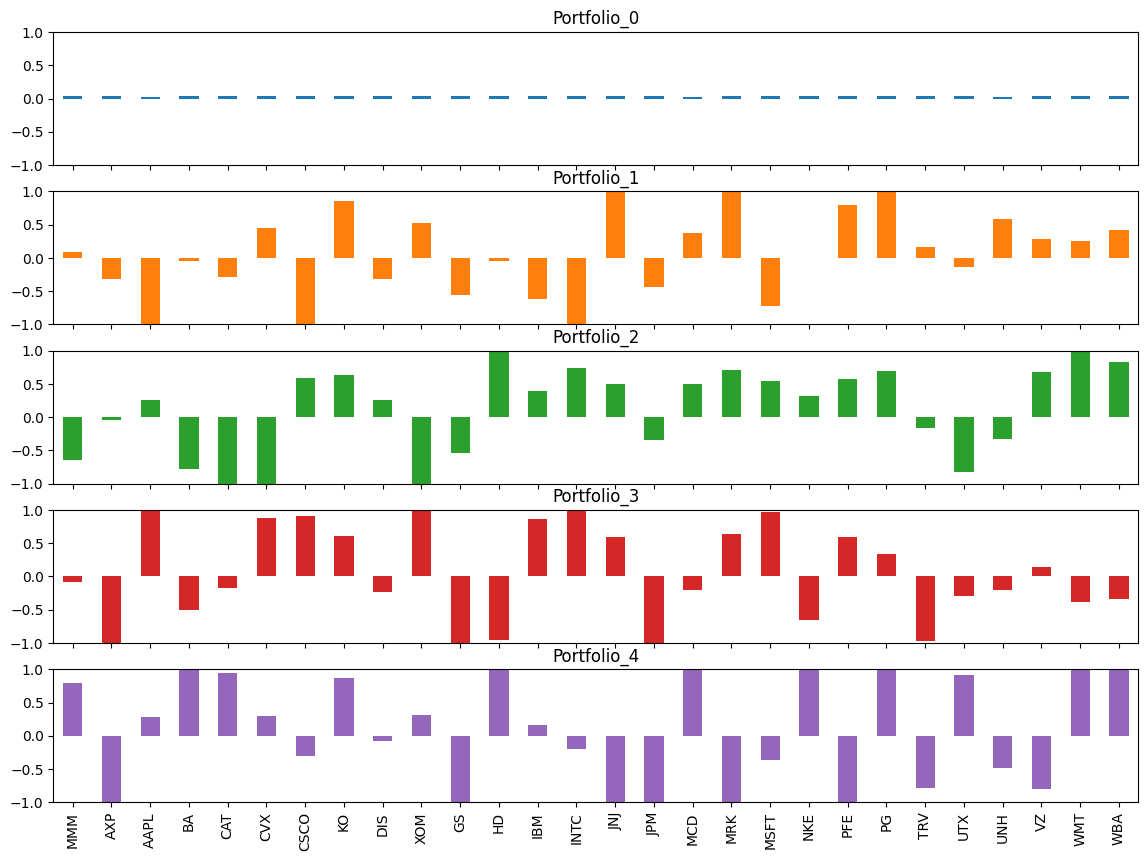

In [20]:
eigen_portfolios = topPortfolios.div(topPortfolios.sum(axis=1), axis=0)
eigen_portfolios.index = [f"Portfolio_{i}" for i in range(NumComponents)]
display(eigen_portfolios)
display(pca.explained_variance_)
display(np.sqrt(pca.explained_variance_))
eigen_portfolios.T.plot.bar(
    subplots=True,
    layout=(int(NumComponents), 1),
    figsize=(14, 10),
    legend=False,
    sharey=True,
    ylim=(-1, 1),
)
# sns.heatmap(topPortfolios)

<Axes: >

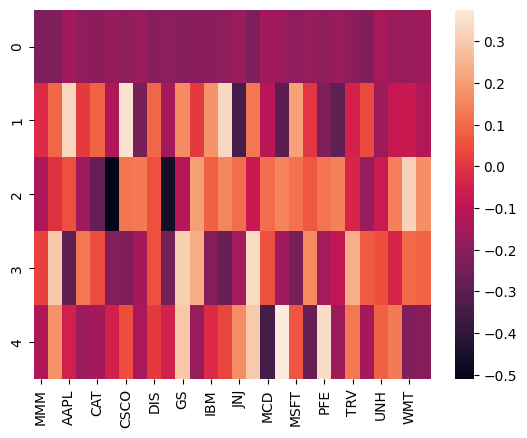

In [21]:
# plotting heatmap
sns.heatmap(topPortfolios)